In [1]:
!pip install deep-translator

DEPRECATION: Loading egg at /Users/philipajao/anaconda3/lib/python3.11/site-packages/tf_keras_contrib-2.0.8-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
pip install pandas

DEPRECATION: Loading egg at /Users/philipajao/anaconda3/lib/python3.11/site-packages/tf_keras_contrib-2.0.8-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install SentencePiece

DEPRECATION: Loading egg at /Users/philipajao/anaconda3/lib/python3.11/site-packages/tf_keras_contrib-2.0.8-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import string
import re
import spacy
from deep_translator import GoogleTranslator

import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

nltk.download('words') #download list of english words
nltk.download('stopwords') #download list of stopwords
englishWords = set(nltk.corpus.words.words())

# Ensure the necessary NLTK resources are downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punktz')

/Users/philipajao/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package words to
[nltk_data]     /Users/philipajao/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/philipajao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/philipajao/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/philipajao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/philipajao/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[

False

# **DATA COLLECTION**

Import multilingual dataset which consist of 25 different languages, the OOD dataset measures Out of Domain generalization, where the claim statements are taken from a different fact checker, while the zeroshot data allows us to test how well our model performs on cross lingual dataset

In [5]:
pwd

'/Users/philipajao/Downloads/thesis'

In [6]:
dev_file_path = '/Users/philipajao/Downloads/thesis/dataset/multilingual/dev.tsv'
ood_file_path = '/Users/philipajao/Downloads/thesis/dataset/multilingual/ood.tsv'
test_file_path = '/Users/philipajao/Downloads/thesis/dataset/multilingual/test.tsv'
train_file_path = '/Users/philipajao/Downloads/thesis/dataset/multilingual/train.tsv'
zeroshot_file_path = '/Users/philipajao/Downloads/thesis/dataset/multilingual/zeroshot.tsv'



#Use error_bad_lines=False to skip bad lines and warn_bad_lines=True to get warnings
try:
    dev_df = pd.read_csv(dev_file_path, sep='\t', on_bad_lines='skip')
    ood_df = pd.read_csv(ood_file_path, sep='\t', on_bad_lines='skip')
    test_df = pd.read_csv(test_file_path, sep='\t', on_bad_lines='skip')
    train_df = pd.read_csv(train_file_path, sep='\t', on_bad_lines='skip')
    zeroshot_df = pd.read_csv(zeroshot_file_path, sep='\t', on_bad_lines='skip')
except Exception as e:
    print(f"An error occurred: {e}")

# Print the length of each dataset
display("Number of rows in Dev dataset is : ", len(dev_df))
display("Number of rows in OOD dataset is : ", len(ood_df))
display("Number of rows in Test dataset is : ", len(test_df))
display("Number of rows in Train dataset is : ", len(train_df))
display("Number of rows in Zeroshot dataset is : ", len(zeroshot_df))

'Number of rows in Dev dataset is : '

2406

'Number of rows in OOD dataset is : '

2110

'Number of rows in Test dataset is : '

3657

'Number of rows in Train dataset is : '

30492

'Number of rows in Zeroshot dataset is : '

3325

In [7]:
pip install --upgrade transformers urllib3

DEPRECATION: Loading egg at /Users/philipajao/anaconda3/lib/python3.11/site-packages/tf_keras_contrib-2.0.8-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/34/71/af30c8afcdbee5d4ee4b89e366bd7c20ab8b07e7b5acb30e025b81e0ba65/transformers-4.43.4-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 27.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.43.3
    Uninstalling transformers-4.43.3:
      Successfully uninstalled transformers-4.43.3
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Convert datatype of columns in dataframes to string
dev_df = dev_df.astype({col: 'string' for col in dev_df.select_dtypes(include='object').columns})
ood_df = ood_df.astype({col: 'string' for col in ood_df.select_dtypes(include='object').columns})
test_df = test_df.astype({col: 'string' for col in test_df.select_dtypes(include='object').columns})
train_df = train_df.astype({col: 'string' for col in train_df.select_dtypes(include='object').columns})
zeroshot_df = zeroshot_df.astype({col: 'string' for col in zeroshot_df.select_dtypes(include='object').columns})

# Display first 5 rows of the train dataset
display(train_df.head())


,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,link_1,link_2,link_3,link_4,link_5,claimDate,reviewDate,claimant,claim,label
0,tr,dogrulukpayi.com,"Son 50 yılın siyasi tarihine bakın, tek başına...","Son 50 yılın siyasi tarihine bakın, tek başına...",Türkiye potansiyelini doğru kullanıp yüzde 7 b...,2020/01/02 — Türkiye Cumhuriyeti tarihinde hiç...,2002/12/09 — Cumhuriyet tarihi boyunca tek par...,https://www.dogrulukpayi.com/iddia-kontrolu/so...,https://www.dogrulukpayi.com/yazar/furkan-demi...,https://businessht.bloomberght.com/yazarlar/ca...,https://www.mahfiegilmez.com/2020/01/turkiye-e...,https://www.hurriyet.com.tr/ekonomi/tek-parti-...,none,none,Binali Yıldırım,"Son 50 yılın siyasi tarihine bakın, tek başına...",false
1,ka,factcheck.ge,"Oct 4, 2018 — იტალიის სამაშველო სამსახურებს მი...",ევროპული ღირებულებები - იტალიის სამაშველო სამს...,ევროპული ღირებულებები - იტალიის სამაშველო სამს...,<DUMMY_EVIDENCE>,<DUMMY_EVIDENCE>,https://factcheck.ge/ka/story/37352-evropuli-g...,https://factcheck.ge/ka/page/persons/thbilisi-24,http://142.93.167.204/ka/page/persons/thbilisi-24,NO_LINK,NO_LINK,none,none,თბილისი 24,ევროპული ღირებულებები - იტალიის სამაშველო სამს...,partly true/misleading
2,pt,piaui.folha.uol.com.br,"03.11.2020 — “Aqui em São Paulo, nós estamos c...","03.11.2020 — ... França erra sobre creches, mo...",05.06.2020 — A lei aprovada pelo Congresso que...,Caixa paga auxílio emergencial de R$ 600 e R$ ...,"7 de julho de 2020, 15:20h ... Porém, diferent...",https://piaui.folha.uol.com.br/lupa/2020/11/03...,https://www1.folha.uol.com.br/poder/2020/11/na...,https://g1.globo.com/economia/noticia/2020/06/...,https://jc.ne10.uol.com.br/economia/2020/11/11...,https://noticiasconcursos.com.br/direitos-trab...,2020-11-03T12:41:12Z,2020-11-03T12:41:12Z,Márcio França (PSB),"Aqui em São Paulo, nós estamos com 2,7 milhões...",partly true/misleading
3,ka,factcheck.ge,"Sep 12, 2016 — ირაკლი ხახუბია, ""ნაციონალური მო...","ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...","ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...","ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...",<DUMMY_EVIDENCE>,https://factcheck.ge/ka/story/23935-irakli-kha...,https://factcheck.ge/ka/stories/archive?page=128,http://142.93.167.204/ka/stories/archive?page=140,http://142.93.167.204/ka/topics/%E1%83%9E%E1%8...,NO_LINK,none,none,შალვა ნათელაშვილი,"ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...",true
4,id,cekfakta.com,"Sep 18, 2018 — Akun @lambeturah memposting seb...",[SALAH] Zumi Zola Jalan-Jalan Di Bandara Soeka...,[DISINFORMASI] Zumi Zola Jalan-Jalan Di Bandar...,"Sep 17, 2018 — JAKARTA, KOMPAS.com - Pengacara...","Sep 17, 2018 — Jakarta, CNN Indonesia -- Sebua...",https://turnbackhoax.id/2018/09/18/salah-zumi-...,https://ru-ru.facebook.com/groups/fafhh/permal...,https://cekfakta.com/focus/459,https://nasional.kompas.com/read/2018/09/17/10...,https://www.cnnindonesia.com/nasional/20180917...,none,2018-09-18T00:00:00Z,none,Zumi Zola Jalan-Jalan Di Bandara Soekarno-Hatta,false


# **DATA CLEANING**

# Remove Unecessary Columns

Remove unecessary columns which are claimDate and reviewDate


In [9]:
# Remove unecessary columns
columns_to_remove = ['claimDate', 'reviewDate']
dev_df = dev_df.drop(columns=columns_to_remove)
ood_df = ood_df.drop(columns=columns_to_remove)
test_df = test_df.drop(columns=columns_to_remove)
train_df = train_df.drop(columns=columns_to_remove)
zeroshot_df = zeroshot_df.drop(columns=columns_to_remove)

# Print the first few rows of the dataframe to verify the removal
train_df.head()

,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,link_1,link_2,link_3,link_4,link_5,claimant,claim,label
0,tr,dogrulukpayi.com,"Son 50 yılın siyasi tarihine bakın, tek başına...","Son 50 yılın siyasi tarihine bakın, tek başına...",Türkiye potansiyelini doğru kullanıp yüzde 7 b...,2020/01/02 — Türkiye Cumhuriyeti tarihinde hiç...,2002/12/09 — Cumhuriyet tarihi boyunca tek par...,https://www.dogrulukpayi.com/iddia-kontrolu/so...,https://www.dogrulukpayi.com/yazar/furkan-demi...,https://businessht.bloomberght.com/yazarlar/ca...,https://www.mahfiegilmez.com/2020/01/turkiye-e...,https://www.hurriyet.com.tr/ekonomi/tek-parti-...,Binali Yıldırım,"Son 50 yılın siyasi tarihine bakın, tek başına...",false
1,ka,factcheck.ge,"Oct 4, 2018 — იტალიის სამაშველო სამსახურებს მი...",ევროპული ღირებულებები - იტალიის სამაშველო სამს...,ევროპული ღირებულებები - იტალიის სამაშველო სამს...,<DUMMY_EVIDENCE>,<DUMMY_EVIDENCE>,https://factcheck.ge/ka/story/37352-evropuli-g...,https://factcheck.ge/ka/page/persons/thbilisi-24,http://142.93.167.204/ka/page/persons/thbilisi-24,NO_LINK,NO_LINK,თბილისი 24,ევროპული ღირებულებები - იტალიის სამაშველო სამს...,partly true/misleading
2,pt,piaui.folha.uol.com.br,"03.11.2020 — “Aqui em São Paulo, nós estamos c...","03.11.2020 — ... França erra sobre creches, mo...",05.06.2020 — A lei aprovada pelo Congresso que...,Caixa paga auxílio emergencial de R$ 600 e R$ ...,"7 de julho de 2020, 15:20h ... Porém, diferent...",https://piaui.folha.uol.com.br/lupa/2020/11/03...,https://www1.folha.uol.com.br/poder/2020/11/na...,https://g1.globo.com/economia/noticia/2020/06/...,https://jc.ne10.uol.com.br/economia/2020/11/11...,https://noticiasconcursos.com.br/direitos-trab...,Márcio França (PSB),"Aqui em São Paulo, nós estamos com 2,7 milhões...",partly true/misleading
3,ka,factcheck.ge,"Sep 12, 2016 — ირაკლი ხახუბია, ""ნაციონალური მო...","ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...","ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...","ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...",<DUMMY_EVIDENCE>,https://factcheck.ge/ka/story/23935-irakli-kha...,https://factcheck.ge/ka/stories/archive?page=128,http://142.93.167.204/ka/stories/archive?page=140,http://142.93.167.204/ka/topics/%E1%83%9E%E1%8...,NO_LINK,შალვა ნათელაშვილი,"ირაკლი ხახუბია, ""ნაციონალური მოძრაობის"" სპონსო...",true
4,id,cekfakta.com,"Sep 18, 2018 — Akun @lambeturah memposting seb...",[SALAH] Zumi Zola Jalan-Jalan Di Bandara Soeka...,[DISINFORMASI] Zumi Zola Jalan-Jalan Di Bandar...,"Sep 17, 2018 — JAKARTA, KOMPAS.com - Pengacara...","Sep 17, 2018 — Jakarta, CNN Indonesia -- Sebua...",https://turnbackhoax.id/2018/09/18/salah-zumi-...,https://ru-ru.facebook.com/groups/fafhh/permal...,https://cekfakta.com/focus/459,https://nasional.kompas.com/read/2018/09/17/10...,https://www.cnnindonesia.com/nasional/20180917...,none,Zumi Zola Jalan-Jalan Di Bandara Soekarno-Hatta,false


# Remove rows with null values

Check percentage of  rows with 'NO_LINK', 'DUMMY_EVIDENCE' and empty values from the dataset, to know if to remove those rows or replace them with a placeholder

In [10]:
# Define a function to calculate and display the amount of rows with 'NO_LINK', '<DUMMY_EVIDENCE>' and null values in dataset
def count_and_display(df, df_name):
    rows_with_no_link = df.apply(lambda row: row.str.contains('NO_LINK').any(), axis=1).sum()
    rows_with_na = df.apply(lambda row: row.str.contains('NA').any(), axis=1).sum()
    rows_with_empty = df.isna().any(axis=1).sum()
    total = rows_with_no_link + rows_with_na + rows_with_empty
    percentage = ((total / len(df)) * 100).round(2)
    display(f"Number of rows with NO LINK, <DUMMY_EVIDENCE> and null values in {df_name} dataset is : {total}({percentage}%) out of {len(df)} rows")
    display()  # Just for separating outputs of different dataframes

# Iterate over each dataframe for 'NO_LINK', '<DUMMY_EVIDENCE>' and null values
for df_name, df in [('dev_df', dev_df), ('ood_df', ood_df), ('test_df', test_df), ('train_df', train_df), ('zeroshot_df', zeroshot_df)]:
    count_and_display(df, df_name)


'Number of rows with NO LINK, <DUMMY_EVIDENCE> and null values in dev_df dataset is : 403(16.75%) out of 2406 rows'

'Number of rows with NO LINK, <DUMMY_EVIDENCE> and null values in ood_df dataset is : 408(19.34%) out of 2110 rows'

'Number of rows with NO LINK, <DUMMY_EVIDENCE> and null values in test_df dataset is : 3684(100.74%) out of 3657 rows'

'Number of rows with NO LINK, <DUMMY_EVIDENCE> and null values in train_df dataset is : 3959(12.98%) out of 30492 rows'

'Number of rows with NO LINK, <DUMMY_EVIDENCE> and null values in zeroshot_df dataset is : 458(13.77%) out of 3325 rows'

The test dataset clearly has mostly dirty data, so a percentage of the clean dataset will be extracted to represent the test dataset.Since the percentage of rows with  'NO_LINK', 'DUMMY_EVIDENCE' and 'NA" for the other data is not up to 20%, we can remove those rows.

In [11]:
dev_clean_df = dev_df.copy()
ood_clean_df = ood_df.copy()
test_clean_df = test_df.copy()
train_clean_df = train_df.copy()
zeroshot_clean_df = zeroshot_df.copy()

In [12]:
#Remove rows with 'NO_LINK', 'DUMMY_EVIDENCE' and 'NA'
dev_no_link_rows = dev_clean_df.apply(lambda row: row.str.contains('NO_LINK').any(), axis=1)
dev_na_rows = dev_clean_df.apply(lambda row: row.str.contains('NA').any(), axis=1)
dev_empty_rows = dev_clean_df.isna().any(axis=1);
ood_no_link_rows = ood_clean_df.apply(lambda row: row.str.contains('NO_LINK').any(), axis=1)
ood_na_rows = ood_clean_df.apply(lambda row: row.str.contains('NA').any(), axis=1)
ood_empty_rows = ood_clean_df.isna().any(axis=1);
test_no_link_rows = test_clean_df.apply(lambda row: row.str.contains('NO_LINK').any(), axis=1)
test_na_rows = test_clean_df.apply(lambda row: row.str.contains('NA').any(), axis=1)
test_empty_rows = test_clean_df.isna().any(axis=1);
train_no_link_rows = train_clean_df.apply(lambda row: row.str.contains('NO_LINK').any(), axis=1)
train_na_rows = train_clean_df.apply(lambda row: row.str.contains('NA').any(), axis=1)
train_empty_rows = train_clean_df.isna().any(axis=1);
zeroshot_no_link_rows = zeroshot_clean_df.apply(lambda row: row.str.contains('NO_LINK').any(), axis=1)
zeroshot_na_rows = zeroshot_clean_df.apply(lambda row: row.str.contains('NA').any(), axis=1)
zeroshot_empty_rows = zeroshot_clean_df.isna().any(axis=1);

combined_dev = dev_no_link_rows | dev_na_rows | dev_empty_rows
combined_ood = ood_no_link_rows | ood_na_rows | ood_empty_rows
combined_test = test_no_link_rows | test_na_rows | test_empty_rows
combined_train = train_no_link_rows | train_na_rows | train_empty_rows
combined_zeroshot = zeroshot_no_link_rows | zeroshot_na_rows | zeroshot_empty_rows

dev = dev_clean_df[~combined_dev]
dev.reset_index(drop=True, inplace=True)
ood = ood_clean_df[~combined_ood]
ood.reset_index(drop=True, inplace=True)
test = test_clean_df[~combined_test]
test.reset_index(drop=True, inplace=True)
train = train_clean_df[~combined_train]
train.reset_index(drop=True, inplace=True)
zeroshot = zeroshot_clean_df[~combined_zeroshot]
zeroshot.reset_index(drop=True, inplace=True)

# Check to ensure all those rows have been removed
for df_name, df in [('dev', dev), ('ood', ood), ('test', test), ('train', train), ('zeroshot', zeroshot)]:
    count_and_display(df, df_name)

'Number of rows with NO LINK, <DUMMY_EVIDENCE> and null values in dev dataset is : 0(0.0%) out of 2015 rows'

'Number of rows with NO LINK, <DUMMY_EVIDENCE> and null values in ood dataset is : 0(0.0%) out of 1712 rows'

'Number of rows with NO LINK, <DUMMY_EVIDENCE> and null values in test dataset is : 0(0.0%) out of 4 rows'

'Number of rows with NO LINK, <DUMMY_EVIDENCE> and null values in train dataset is : 0(0.0%) out of 26648 rows'

'Number of rows with NO LINK, <DUMMY_EVIDENCE> and null values in zeroshot dataset is : 0(0.0%) out of 2876 rows'

Since most of the test dataset was lost in cleaning, a random sample 2,665(12%) rows of the train dataset will be extracted at to make up the test dataset. The sample will be removed from the train dataset to avoid overfitting.

In [13]:
# To prevent adding sampled rows to test dataset multiple times; check if len of test dataset is < 2500
if len(test) < 2500:
  # Extract a random sample of 20% of the rows from the training dataset
  sampled_train = train.sample(frac=0.12, random_state=42)

  # Remove the sampled rows from the training dataset
  train = train.drop(sampled_train.index)

  # Reset index of the original train dataset
  train.reset_index(drop=True, inplace=True)

  # Display number of rows in the sampled train dataset
  display("Number of rows in sampled train dataset:", len(sampled_train))

  # Add the sampled rows to the test dataset
  test = pd.concat([pd.DataFrame(), sampled_train], ignore_index=True)

  # Display number of rows in the test dataset
  display("Number of rows in test dataset:", len(test))

  #Display first 5 rows of test
  display(test.head(20))

'Number of rows in sampled train dataset:'

3198

'Number of rows in test dataset:'

3198

,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,link_1,link_2,link_3,link_4,link_5,claimant,claim,label
0,it,pagellapolitica.it,7 sep. 2018 — Quanto spende lo Stato per i ser...,10 nov. 2018 — Quanto costano i diversi minist...,27 okt. 2019 — In crescita la spesa della Pubb...,26 okt. 2019 — Per la Cgia di Mestre la Pubbli...,"20 dec. 2019 — Di recente però lo SVIMEZ, il c...",https://pagellapolitica.it/dichiarazioni/8097/...,https://www.agi.it/economia/copernicani_conti_...,https://quifinanza.it/finanza/pubblica-amminis...,https://www.ilgiornale.it/news/economia/cgia-m...,https://www.ilpost.it/2019/12/20/spesa-pubblic...,Gennaro Migliore,Quanto spende lo Stato per i servizi pubblici?,mostly true
1,pl,demagog.org.pl,"Są oni wyznaczani przez prezydenta, potem ich ...",Jump to Sędziowie — Sędziów federalnych powołu...,"Jump to Nominacja, potwierdzenie i powołanie —...","Sposoby powoływania sędziów, w tym sędziów sąd...","Była mowa o tym, że prezydent Stanów Zjednoczo...",https://pl.wikipedia.org/wiki/S%C4%85d_Najwy%C...,https://pl.wikipedia.org/wiki/S%C4%85dy_federa...,https://pl.qaz.wiki/wiki/Supreme_Court_of_the_...,http://przegladeuropejski.wnpism.uw.edu.pl/zas...,https://demagog.org.pl/wypowiedzi/sad-najwyzsz...,Zbigniew Ziobro,W Stanach Zjednoczonych sędziów Sądu Najwyższe...,true
2,pt,poligrafo.sapo.pt,Está a espalhar-se nas redes sociais um vídeo ...,4 juni 2019 — Está a espalhar-se nas redes soc...,"3 juni 2019 — ""O que acredito é que haja vonta...",João Doria. Vice-Governador. Rodrigo Garcia. S...,Circula nas redes sociais um vídeo que mostra ...,https://poligrafo.sapo.pt/fact-check/o-video-v...,https://www.novafrica.co.ao/mais/necrologia/re...,https://www.sabado.pt/mundo/detalhe/joao-soare...,https://efape.educacao.sp.gov.br/curriculopaul...,https://fr-fr.facebook.com/LupaNews/posts/,none,Está a espalhar-se nas redes sociais um vídeo ...,true
3,id,cekfakta.com,"Oct 10, 2020 — “Seandainya omnisbus law itu bu...",... video oknum polisi sedang menindak demonst...,"Oct 10, 2020 — ... polisi sedang menindak demo...",[SALAH] “Seandainya Omnisbus Law Itu Buat Yg B...,... video oknum polisi sedang menindak demonst...,https://turnbackhoax.id/2020/10/10/salah-seand...,https://www.facebook.com/permalink.php?id=8693...,https://www.facebook.com/MafindoID/posts/19330...,https://jamaninfo.com/jokowi-tegaskan-rakyat-i...,https://wopita.com/tag/cekfakta?_url=%2Ftag%2F...,none,“Seandainya Omnisbus Law Itu Buat Yg Berbaju C...,false
4,pt,piaui.folha.uol.com.br,“Vitória tem uma malha de ônibus que atende a ...,"Portanto, recomendamos que você procure as via...","Universidade Federal de Sergipe, Aracaju, Bras...",Viação Águia Branca - Passagens de Ônibus onli...,"Oct 8, 2020 — ARACAJU E SALVADOR – A plataform...",https://piaui.folha.uol.com.br/lupa/2020/10/29...,https://www.checkmybus.com.br/aracaju/vitoria-...,https://www.scielo.br/scielo.php?script=sci_ar...,https://queropassagem.com.br/auto-viacao-aguia...,https://revistadoonibus.com/2020/10/08/aguia-f...,Rodrigo Valadares (PTB),“Vitória tem uma malha de ônibus que atende a ...,partly true/misleading
5,es,chequeado.com,"15.03.2011 — Por añadidura, la afirmación del ...",05.03.2011 — Los proyectos que pidió Cristina ...,05.03.2011 — ... Federal avanzan en la formaci...,05.03.2011 — Previous Los proyectos que pidió ...,Los proyectos que pidió Cristina al Congreso e...,https://chequeado.com/ultimas-noticias/perfil-...,https://www.perfil.com/noticias/politica/los-p...,http://compactopolitico.com/2011/03/05/acerca-...,https://compactopolitico.com/2011/03/05/santa-...,https://foroblogdenoticias.blogspot.com/2011/0...,Perfil,“Los proyectos que pidió Cristina al Congreso ...,complicated/hard to categorise
6,en,politifact.com,"Feb 26, 2018 ... No wonder the Republicans are...",Gene Green is the NRA's favorite Democrat in C...,"Jan 30, 2016 ... Gene Green Should Have Been F...","Democrat from Texas ... ""Gene Green is the NRA...",National Republican Congressional Committee 

# Handle the language column

Change the abbreviations in the language column to their full meanings to help with google translate

In [14]:
# Define the mapping dictionary
language_mapping = {
    'tr': 'Turkish',
    'pt': 'Portuguese',
    'id': 'Indonesian',
    'it': 'Italian',
    'ro': 'Romanian',
    'pl': 'Polish',
    'de': 'German',
    'ka': 'Georgian',
    'hi': 'Hindi',
    'ta': 'Tamil',
    'ar': 'Arabic',
    'sr': 'Serbian',
    'en': 'English',
    'es': 'Spanish',
    'ru': 'Russian',
    'sq': 'Albanian',
    'gu': 'Gujarati',
    'no': 'Norwegian',
    'si': 'Sinhalese',
    'nl': 'Dutch',
    'az': 'Azerbaijani',
    'bn': 'Bengali',
    'fa': 'Persian',
    'mr': 'Marathi',
    'fr': 'French',
    'pa': 'Punjabi'
}

# Replace the values in the 'language' column using the mapping dictionary
train.loc[:, 'language_full'] = train['language'].replace(language_mapping)
dev.loc[:, 'language_full'] = dev['language'].replace(language_mapping)
ood.loc[:, 'language_full'] = ood['language'].replace(language_mapping)
test.loc[:, 'language_full'] = test['language'].replace(language_mapping)
zeroshot.loc[:, 'language_full'] = zeroshot['language'].replace(language_mapping)

# Display the first few rows of the updated datasets
display(train['language_full'].unique())
display(dev['language_full'].unique())
display(ood['language_full'].unique())
display(test['language_full'].unique())
display(zeroshot['language_full'].unique())


/var/folders/vh/v_phs5nx2v5d44930q604pjw0000gn/T/ipykernel_1242/3522759521.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev.loc[:, 'language_full'] = dev['language'].replace(language_mapping)
/var/folders/vh/v_phs5nx2v5d44930q604pjw0000gn/T/ipykernel_1242/3522759521.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ood.loc[:, 'language_full'] = ood['language'].replace(language_mapping)
/var/folders/vh/v_phs5nx2v5d44930q604pjw0000gn/T/ipykernel_1242/3522759521.py:36: SettingWithCopyWarning: 
A val

<StringArray>
[   'Turkish', 'Portuguese', 'Indonesian',    'Italian',   'Romanian',
     'Polish',     'German',   'Georgian',      'Hindi',      'Tamil',
     'Arabic',    'Serbian',    'English',    'Spanish']
Length: 14, dtype: string

<StringArray>
['Portuguese',    'Italian',      'Hindi',     'Polish',     'Arabic',
   'Georgian', 'Indonesian',     'German',      'Tamil',    'Serbian',
   'Romanian',    'Turkish',    'Spanish']
Length: 13, dtype: string

<StringArray>
['Italian', 'Indonesian', 'Portuguese', 'Hindi', 'Turkish']
Length: 5, dtype: string

<StringArray>
[   'Italian',     'Polish', 'Portuguese', 'Indonesian',    'Spanish',
    'English',     'German',    'Turkish',      'Hindi',   'Georgian',
     'Arabic',   'Romanian',    'Serbian',      'Tamil']
Length: 14, dtype: string

<StringArray>
[    'Russian',    'Albanian',    'Gujarati',   'Norwegian',   'Sinhalese',
       'Dutch', 'Azerbaijani',     'Bengali',     'Persian',     'Marathi',
      'French',     'Punjabi']
Length: 12, dtype: string

# **DATA CLEANING PRE-PROCESSING**

Followed pre-processing steps from https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

# Convert text to english

After converting the evidence to english, the datasets had to be exported because it took a lot of computational power and time so i had to make use of batch processing, which involves dividing the dataset into batches and saving those batches in google drive so if colab shuts down abruptly, the process just continues from the last version of the dataset which was being converted to english.

In [15]:
import os

def translate_to_english(df, start=0, batch_size=100):
  # Columns to translate
  cols_to_translate = ['evidence_1', 'evidence_2', 'evidence_3', 'evidence_4', 'evidence_5', 'claim']

  # Process the DataFrame in batches
  for i in range(start, min(start + batch_size, len(df))):

    for col in cols_to_translate:
      translated_col = col + '_translated'
      row = df.iloc[i]
      try:
        original_text = df.loc[i, col]
        language = df.loc[i, 'language']
        translated_text = GoogleTranslator(source=language, target='en').translate(original_text)
        df.loc[i, translated_col] = translated_text
      except Exception as e:
        print(f"Error translating row {i} column {col}: {e}")

  return df


# Function to get the last processed batch file and continue from there
def get_last_processed_batch_file(directory, df_name):
  files = os.listdir(directory)
  batch_numbers = [int(f.split('_')[-1].split('.')[0]) for f in files if f.startswith(f'translated_{df_name}_batch_')]
  latest_batch_number = max(batch_numbers, default=0)
  latest_file = ''
  last_batch_no = 0
  for file in files:
    if file.startswith(f'translated_{df_name}_batch_{latest_batch_number}'):
      latest_file = file
      last_batch_no = latest_batch_number
  return last_batch_no, os.path.join(directory, latest_file)

# Translate in batches and save progress
batch_size = 100
for df_name, df in [('dev', dev),('ood', ood), ('test', test), ('train', train), ('zeroshot', zeroshot)]:
  reloading = True;
  start_batch = 0;

  # Check colab stopped abruptly: if true - try retrieving the last file
  if reloading:
    last_batch, last_file = get_last_processed_batch_file(f'/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/translated_dataset/{df_name}_translated/', df_name)
    if last_batch != 0:
      print(f"Loading from last saved file: {last_file}")
      df = pd.read_csv(last_file)
      start_batch = (last_batch) * batch_size
      reloading = False;
    else:
      print(f"No saved files found for {df_name}, starting from scratch.")
      start_batch = 0


    print(f"Resuming from batch {last_batch + 1} for dataset {df_name}.")

  for start in range(start_batch, len(df), batch_size):
      var_name = df_name + 'new';
      var_name = translate_to_english(df, start=start, batch_size=batch_size)
      var_name .to_csv(f'/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/translated_dataset/{df_name}_translated/translated_{df_name}_batch_{start // batch_size + 1}.csv', index=False)  # Save progress
      display(f"Batch {start // batch_size + 1} for {df_name} completed and saved.")

Loading from last saved file: /Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/translated_dataset/dev_translated/translated_dev_batch_21.csv
Resuming from batch 22 for dataset dev.
Loading from last saved file: /Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/translated_dataset/ood_translated/translated_ood_batch_18.csv
Resuming from batch 19 for dataset ood.
Loading from last saved file: /Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/translated_dataset/test_translated/translated_test_batch_32.csv
Resuming from batch 33 for dataset test.
Loading from last saved file: /Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/translated_dataset/train_translated/translated_train_batch_235.csv
Resuming from batch 236 for dataset train.
Loading from last saved file: /Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/translated_dataset/zeroshot_translated/translated_zeroshot_batch_29.csv
Resuming from batch 30 for dataset zero

In [16]:
# Get the converted dataset and store as dataframe
ood_translated = pd.read_csv('/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/translated_dataset/ood_translated/translated_ood_batch_18.csv')
dev_translated = pd.read_csv('/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/translated_dataset/dev_translated/translated_dev_batch_21.csv')
train_translated = pd.read_csv('/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/translated_dataset/train_translated/translated_train_batch_235.csv')
test_translated = pd.read_csv('/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/translated_dataset/test_translated/translated_test_batch_32.csv')
zeroshot_translated = pd.read_csv('/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/translated_dataset/zeroshot_translated/translated_zeroshot_batch_29.csv')

# Remove columns link_1, link_2, link_3, link_4 and link_5
ood_translated = ood_translated.drop(['link_1', 'link_2', 'link_3', 'link_4', 'link_5', 'claimant'], axis=1)
dev_translated = dev_translated.drop(['link_1', 'link_2', 'link_3', 'link_4', 'link_5', 'claimant'], axis=1)
train_translated = train_translated.drop(['link_1', 'link_2', 'link_3', 'link_4', 'link_5', 'claimant'], axis=1)
test_translated = test_translated.drop(['link_1', 'link_2', 'link_3', 'link_4', 'link_5', 'claimant'], axis=1)
zeroshot_translated = zeroshot_translated.drop(['link_1', 'link_2', 'link_3', 'link_4', 'link_5', 'claimant'], axis=1)

# Display first few rows of the translated datasets
display(ood_translated.head())
display(dev_translated.head())
display(train_translated.head())
display(test_translated.head())
display(zeroshot_translated.head())

,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,claim,label,language_full,evidence_1_translated,evidence_2_translated,evidence_3_translated,evidence_4_translated,evidence_5_translated,claim_translated
0,it,agi.it,"Jul 9, 2020 — È online la “Relazione contenent...",l’Italia è tra i Paesi a sviluppo avanzato con...,"Oct 11, 2018 — “È bene ricordare che l'Italia ...","Jun 19, 2020 — Nel 2018 sono state notificate ...",della maternità e per l'interruzione volontari...,l’Italia è tra i Paesi a sviluppo avanzato con...,TRUE,Italian,"Jul 9, 2020 — The ""Report containing the defin...",Italy is among the advanced developing countri...,"Oct 11, 2018 — “It is worth remembering that I...","Jun 19, 2020 — In 2018, 76,328 voluntary inter...",of maternity and for voluntary termination of ...,Italy is among the advanced developing countri...
1,id,cekfakta.tempo.co,Foto yang diklaim sebagai foto Titiek Soeharto...,30 sep. 2019 — Foto ini diklaim sebagai foto T...,29 juni 2020 — Foto Tommy Soeharto yang diklai...,Foto tersebut diambil bukan saat demo RUU HIP ...,"29 juni 2020 — Di foto itu, Titiek Soeharto se...",Foto yang diklaim sebagai foto Titiek Soeharto...,FALSE,Indonesian,Photo claimed to be a photo of Titiek Soeharto...,September 30 2019 — This photo is claimed to b...,29 June 2020 — Photo of Tommy Soeharto who is ...,This photo was not taken during the HIP Bill d...,"29 June 2020 — In the photo, Titiek Soeharto i...",Photo claimed to be a photo of Titiek Soeharto...
2,pt,aosfatos.org,Manifestação em Brasília foi incrível #ForaBol...,3 maj 2020 — Uma carreata está sendo realizada...,15 mars 2020 — BRASÍLIA — O presidente Jair Bo...,Fotos mostram carreata realizada em Brasília e...,Vídeo mostra carreata pelo impeachment de Bols...,Fotos mostram carreata realizada em Brasília e...,partly true/misleading,Portuguese,Demonstration in Brasília was incredible #Fora...,"May 3, 2020 — A motorcade is being held this S...","March 15, 2020 — BRASÍLIA — President Jair Bol...",Photos show a motorcade held in Brasília on 3/5,Video shows a motorcade for Bolsonaro's impeac...,Photos show a motorcade held in Brasília on 3/5
3,id,cekfakta.tempo.co,2020/06/26 — Beredar klaim Gibran menyalahkan ...,Gibran Rakabuming salahkan rakyat yang tak pat...,Penjelasan : Beredar sebuah unggahan di media ...,2020/04/28 — Hasil Periksa Fakta Auliyaa Muham...,2020/04/29 — Benarkah Gibran menyalahkan warga...,Gibran Rakabuming salahkan rakyat yang tak pat...,partly true/misleading,Indonesian,06/26/2020 — Gibran's claim is circulating tha...,Gibran Rakabuming blames people who do not obe...,Explanation: A post circulated on Facebook soc...,04/28/2020 — Fact Check Results Auliyaa Muhamm...,2020/04/29 — Is it true that Gibran blames cit...,Gibran Rakabuming blames people who do not obe...
4,hi,hindi.newschecker.in,"Jan 17, 2021 — ... Dr. Li Wenliang ने कहा है क...","Mar 19, 2020 — कोरोना वायरस को फैलने से रोकने ...",Dr. Li Wenliang ने कहा दिन में तीन-चार बार चाय...,"Jun 9, 2020 — फैक्ट चेक:क्या चाय पीने वालों को...","Jun 12, 2020 — Will Corona virus be removed by...",Dr. Li Wenliang ने कहा दिन में तीन-चार बार चाय...,FALSE,Hindi,"Jan 17, 2021 — ... Dr. Li Wenliang has said th...","Mar 19, 2020 — We are hearing many different t...",Dr. Li Wenliang said that drinking tea three t...,"Jun 9, 2020 — Fact Check: Do tea drinkers not ...","Jun 12, 2020 — Will Corona virus be removed by...",Dr. Li Wenliang said that drinking tea three t...


,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,claim,label,language_full,evidence_1_translated,evidence_2_translated,evidence_3_translated,evidence_4_translated,evidence_5_translated,claim_translated
0,pt,piaui.folha.uol.com.br,"May 25, 2018 — “[O desmatamento ilegal] Subiu ...",O Plano de Ação para Prevenção e Controle do D...,Em torno de 50% do preço dos combustíveis tem ...,"Nov 14, 2013 — O dado está 37% a mais do que h...",“[O desmatamento ilegal] Subiu de 2012 pra cá ...,[O desmatamento ilegal] Subiu de 2012 pra cá e...,mostly true,Portuguese,"May 25, 2018 — “[Illegal deforestation] has in...",The Action Plan for the Prevention and Control...,Around 50% of the price of fuel has to do with...,"Nov 14, 2013 — The data is 37% higher than wha...",“[Illegal deforestation] has increased by arou...,[Illegal deforestation] Has increased by aroun...
1,pt,poligrafo.sapo.pt,45. Novos negócios. 46. Inovação não se faz so...,Crear cuenta nueva ... Palomitas de maíz y cin...,"Jov@Emprego, executado pela Organização Intern...","Deste modo, como vemos na Tabela 1, cerca de 2...","Não sei porquê, passamos a cumprimentarmo-nos ...",“Passámos de uma empresa que demorava cerca de...,partly true/misleading,Portuguese,45. New business. 46. ​​Innovation is not done...,Create a new account... Loading bags and movie...,"Jov@Emprego, run by the International Labour O...","Thus, as we see in Table 1, around 21 million ...","I don't know why, we started greeting each oth...",“We went from a company that took around 45 da...
2,pt,piaui.folha.uol.com.br,A origem da Black Friday vem dos EUA na época ...,"Nov 26, 2018 — ""A origem da Black Friday vem d...",A dúvida surgiu nas redes sociais. Milhares de...,"Black Friday (em português, sexta-feira negra)...",A Black Friday tem relação histórica com a esc...,A origem da Black Friday vem dos EUA na época ...,false,Portuguese,The origins of Black Friday come from the USA ...,"Nov 26, 2018 — ""The origins of Black Friday co...",The question arose on social media. Thousands ...,"Black Friday (in Portuguese, black Friday) is ...",Black Friday has a historical relationship wit...,The origins of Black Friday come from the USA ...
3,pt,piaui.folha.uol.com.br,"Há 20 anos, nascia a pioneira Controladoria Ge...","Feb 7, 2020 — A Controladoria e Ouvidoria Gera...",A Controladoria Geral do Município de São Paul...,"Em iniciativa pioneira no município, a Control...","Oct 26, 2020 — Para que seus objetivos sejam a...","De forma pioneira, criamos a Controladoria Ger...",true,Portuguese,"20 years ago, the pioneer General Comptroller ...","Feb 7, 2020 — The General Comptroller and Ombu...",The General Comptroller of the Municipality of...,In a pioneering initiative in the municipality...,"Oct 26, 2020 — In order for its objectives to ...","In a pioneering way, we created the General Co..."
4,it,pagellapolitica.it,«Il blocco dei licenziamenti oggi non c’è più ...,15 okt. 2020 — Svolta del governoDa gennaio st...,22 okt. 2020 — È braccio di ferro tra sindacat...,18 maj 2020 — Il blocco dei licenziamenti oggi...,27 okt. 2020 — A causa della comparsa di casi ...,«Il blocco dei licenziamenti oggi non c’è più ...,true,Italian,«The block on layoffs no longer exists today d...,15 okt. 2020 - Government turning point From J...,22nd October. 2020 — There is a tug of war bet...,18 May 2020 — The block on layoffs no longer e...,27 October. 2020 — Due to the appearance of ca...,«The block on layoffs no longer exists today d...


,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,claim,label,language_full,evidence_1_translated,evidence_2_translated,evidence_3_translated,evidence_4_translated,evidence_5_translated,claim_translated
0,tr,dogrulukpayi.com,"Son 50 yılın siyasi tarihine bakın, tek başına...","Son 50 yılın siyasi tarihine bakın, tek başına...",Türkiye potansiyelini doğru kullanıp yüzde 7 b...,2020/01/02 — Türkiye Cumhuriyeti tarihinde hiç...,2002/12/09 — Cumhuriyet tarihi boyunca tek par...,"Son 50 yılın siyasi tarihine bakın, tek başına...",FALSE,Turkish,Look at the political history of the last 50 y...,Look at the political history of the last 50 y...,Türkiye should use its potential correctly and...,2020/01/02 — In the history of the Republic of...,2002/12/09 — Throughout the history of the Rep...,Look at the political history of the last 50 y...
1,pt,piaui.folha.uol.com.br,"03.11.2020 — “Aqui em São Paulo, nós estamos c...","03.11.2020 — ... França erra sobre creches, mo...",05.06.2020 — A lei aprovada pelo Congresso que...,Caixa paga auxílio emergencial de R$ 600 e R$ ...,"7 de julho de 2020, 15:20h ... Porém, diferent...","Aqui em São Paulo, nós estamos com 2,7 milhões...",partly true/misleading,Portuguese,"03.11.2020 — “Here in São Paulo, we have 2.7 m...",11/3/2020 — ... France makes mistakes about da...,06/05/2020 — The law approved by Congress that...,Caixa pays emergency aid of R$600 and R$300 to...,"July 7, 2020, 3:20 pm... However, unlike how i...","Here in São Paulo, we have 2.7 million people ..."
2,id,cekfakta.com,"Sep 18, 2018 — Akun @lambeturah memposting seb...",[SALAH] Zumi Zola Jalan-Jalan Di Bandara Soeka...,[DISINFORMASI] Zumi Zola Jalan-Jalan Di Bandar...,"Sep 17, 2018 — JAKARTA, KOMPAS.com - Pengacara...","Sep 17, 2018 — Jakarta, CNN Indonesia -- Sebua...",Zumi Zola Jalan-Jalan Di Bandara Soekarno-Hatta,FALSE,Indonesian,"Sep 18, 2018 — The @lambeturah account posted ...",[WRONG] Zumi Zola walks at Soekarno-Hatta Airp...,[DISINFORMATION] Zumi Zola walks at Soekarno-H...,"Sep 17, 2018 — JAKARTA, KOMPAS.com - Lawyer of...","Sep 17, 2018 — Jakarta, CNN Indonesia -- A vid...",Zumi Zola Takes a Walk at Soekarno-Hatta Airport
3,pt,poligrafo.sapo.pt,"29.07.2020 — ""Era bom que fosse assim, mas não...",29.07.2020 — O presidente do PSD considerou es...,20.08.2020 — Líder do PSD diz que os números d...,29.07.2020 — O presidente do PSD iniciou esta ...,05.02.2020 — Segundo indicou esta quarta-feira...,"No Twitter, o PSD escreve que a taxa de desemp...",mostly true,Portuguese,"07/29/2020 — ""It would be good for it to be li...",29.07.2020 — The president of the PSD consider...,20.08.2020 — PSD leader says unemployment figu...,29.07.2020 — The president of the PSD began a ...,05.02.2020 — As indicated this Wednesday by th...,"On Twitter, the PSD writes that the unemployme..."
4,it,pagellapolitica.it,"Jun 11, 2018 — Ma quali sono i numeri dietro i...",Quanto spendono Italia ed Europa per l’immigra...,“una bella sforbiciata ai 5 miliardi” di euro ...,Stiamo lavorando sulla cifra 35 euro: voglio c...,"Aug 30, 2018 — Quanto spende l'Unione europea ...",Quanto spendono Italia ed Europa per l’immigra...,mostly true,Italian,"Jun 11, 2018 — But what are the numbers behind...",How much Italy and Europe spend on immigration,“a nice snip from the 5 billion” of euros that...,We are working on the figure of 35 euros: I wa...,"Aug 30, 2018 — How much does the European Unio...",How much Italy and Europe spend on immigration


,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,claim,label,language_full,evidence_1_translated,evidence_2_translated,evidence_3_translated,evidence_4_translated,evidence_5_translated,claim_translated
0,it,pagellapolitica.it,7 sep. 2018 — Quanto spende lo Stato per i ser...,10 nov. 2018 — Quanto costano i diversi minist...,27 okt. 2019 — In crescita la spesa della Pubb...,26 okt. 2019 — Per la Cgia di Mestre la Pubbli...,"20 dec. 2019 — Di recente però lo SVIMEZ, il c...",Quanto spende lo Stato per i servizi pubblici?,mostly true,Italian,7 sep. 2018 — How much does the State spend on...,Nov. 10 2018 — How much do the different minis...,"Oct. 27, 2019 — Public administration spending...","26 okt. 2019 — For the Cgia of Mestre, the Ita...","20 Dec. 2019 — Recently, however, SVIMEZ, the ...",How much does the state spend on public services?
1,pl,demagog.org.pl,"Są oni wyznaczani przez prezydenta, potem ich ...",Jump to Sędziowie — Sędziów federalnych powołu...,"Jump to Nominacja, potwierdzenie i powołanie —...","Sposoby powoływania sędziów, w tym sędziów sąd...","Była mowa o tym, że prezydent Stanów Zjednoczo...",W Stanach Zjednoczonych sędziów Sądu Najwyższe...,TRUE,Polish,"They are appointed by the president, then thei...",Jump to Judges — Federal judges are appointed ...,"Jump to Nomination, Confirmation and Appointme...","Methods of appointing judges, including judges...",There was talk of the President of the United ...,"In the United States, Supreme Court justices a..."
2,pt,poligrafo.sapo.pt,Está a espalhar-se nas redes sociais um vídeo ...,4 juni 2019 — Está a espalhar-se nas redes soc...,"3 juni 2019 — ""O que acredito é que haja vonta...",João Doria. Vice-Governador. Rodrigo Garcia. S...,Circula nas redes sociais um vídeo que mostra ...,Está a espalhar-se nas redes sociais um vídeo ...,TRUE,Portuguese,A video is spreading on social media in which ...,4 Jun 2019 — A video is spreading on social me...,"3 June 2019 — ""What I believe is that there is...",João Doria. Vice-Governor. Rodrigo Garcia. Sec...,A video is circulating on social media showing...,A video is spreading on social media in which ...
3,id,cekfakta.com,"Oct 10, 2020 — “Seandainya omnisbus law itu bu...",... video oknum polisi sedang menindak demonst...,"Oct 10, 2020 — ... polisi sedang menindak demo...",[SALAH] “Seandainya Omnisbus Law Itu Buat Yg B...,... video oknum polisi sedang menindak demonst...,“Seandainya Omnisbus Law Itu Buat Yg Berbaju C...,FALSE,Indonesian,"Oct 10, 2020 — ""If the omnisbus law was for th...",... video of police officers cracking down on ...,"Oct 10, 2020 — ... the police are cracking dow...","[WRONG] ""If the Omnisbus Law was for those in ...",... video of police officers cracking down on ...,"""If the Omnisbus Law was for those in brown cl..."
4,pt,piaui.folha.uol.com.br,“Vitória tem uma malha de ônibus que atende a ...,"Portanto, recomendamos que você procure as via...","Universidade Federal de Sergipe, Aracaju, Bras...",Viação Águia Branca - Passagens de Ônibus onli...,"Oct 8, 2020 — ARACAJU E SALVADOR – A plataform...",“Vitória tem uma malha de ônibus que atende a ...,partly true/misleading,Portuguese,“Vitória has a bus network that serves 2 milli...,"Therefore, we recommend that you search for cu...","Federal University of Sergipe, Aracaju, Brazil...",Viação Águia Branca - Bus Tickets online ✓ Com...,"Oct 8, 2020 — ARACAJU AND SALVADOR – The Aguia...",“Vitória has a bus network that serves 2 milli...


,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,claim,label,language_full,evidence_1_translated,evidence_2_translated,evidence_3_translated,evidence_4_translated,evidence_5_translated,claim_translated
0,ru,factcheck.kz,"Jul 25, 2020 — Власти США скупили 90% мирового...","Jul 25, 2020 — Власти США скупили почти весь м...","Jul 25, 2020 — Власти США скупили 90% мирового...","Jul 25, 2020 — США скупили 90 процентов мировы...","Jul 1, 2020 — США скупили около 90% трехмесячн...",США скупили 90% запаса препарата «Ремдесивир»,TRUE,Russian,"Jul 25, 2020 - US authorities bought up 90% of...","Jul 25, 2020 - US authorities have bought up a...","Jul 25, 2020 - US authorities bought up 90% of...","Jul 25, 2020 - The United States has bought up...","Jul 1, 2020 — The United States bought up abou...",The United States bought up 90% of the supply ...
1,ru,factcheck.kz,"Feb 20, 2020 — На фоне последних новостей из К...","Feb 25, 2020 — В интернете набирает популярнос...","Feb 26, 2020 — Речь идет о произведении америк...","Feb 28, 2020 — Многие из них уверены, что ее п...","Feb 25, 2020 — Коронавирус из Уханя 2020 нашли...",Писатель Дин Кунц предсказал появление коронав...,partly true/misleading,Russian,"Feb 20, 2020 — Against the backdrop of the lat...","Feb 25, 2020 - A theory is gaining popularity ...","Feb 26, 2020 — We are talking about the work o...","Feb 28, 2020 - Many of them are sure that the ...","Feb 25, 2020 - Coronavirus from Wuhan 2020 was...",Writer Dean Koontz predicted the emergence of ...
2,sq,kallxo.com,Thaçi viziton Isa Mustafën sonte në orët e von...,"Feb 28, 2019 — Uran Ismaili: E kemi paraparë m...",... janë të shpeshta në aparatin ekzistues. “E...,"Jun 14, 2018 — “E kemi paraparë me ble, do të ...","Jun 13, 2018 — “E kemi paraparë me ble, do të ...","E kemi paraparë me ble, do të blehet sivjet, d...",FALSE,Albanian,Thaçi visits Isa Mustafa tonight in the late h...,"Feb 28, 2019 — Uran Ismaili: We envisioned it ...","... are frequent in the existing apparatus. ""W...","June 14, 2018 — ""We envisioned it with a purch...","Jun 13, 2018 — ""We envisioned it with a purcha...","We planned to buy it, it will be bought this y..."
3,gu,gujarati.newschecker.in,"May 14, 2020 — 690થી શરૂ થતા બારકોડ સ્ટીકર્સ મ...",Sticker Studio is the best app to create perso...,Create unlimited Text Sticker to awesome Text ...,"Nov 9, 2018 — પોતાનું સ્ટીકર બનાવવા માટે તમારે...","Sep 13, 2017 — સ્ટીકર્સ ડાઉનલોડ કરવા માટે 12 ....",690થી શરૂ થતા બારકોડ સ્ટીકર્સ મેડ ઈન ચાઈનીઝ પ્...,partly true/misleading,Gujarati,"May 14, 2020 — Barcode stickers starting with ...",Sticker Studio is the best app to create perso...,Create unlimited Text Sticker to awesome Text ...,"Nov 9, 2018 — To make your own sticker you nee...","Sep 13, 2017 — Stickers to download 12 ... bet...",Barcode stickers starting with 690 are made in...
4,no,faktisk.no,Fyrverkeri gjør at småfuglene våre dør av skrekk,"Jan 9, 2018 — Påstand. «[Fyrverkeri gjør at] s...","Jan 1, 2018 — Det fraktes billig fyrverkeri på...","Jan 9, 2018 — Forskerne mener imidlertid at fy...",Fyrverkeri gjør at småfuglene våre dør av skre...,Fyrverkeri gjør at småfuglene våre dør av skrekk,complicated/hard to categorise,Norwegian,Fireworks scare our little birds to death,"Jan 9, 2018 — Allegation. ""[Fireworks scare] o...","Jan 1, 2018 — Cheap fireworks are transported ...","Jan 9, 2018 — However, the researchers believe...",Fireworks scare our little birds to death. Les...,Fireworks scare our little birds to death


### **Check translated dataset to ensure no null values in new column.**

In [17]:
# CHeck colunns in new dataset to ensure no null values

columns_to_check = ['evidence_1', 'evidence_2', 'evidence_3', 'evidence_4', 'evidence_5',
                    'evidence_1_translated', 'evidence_2_translated', 'evidence_3_translated',
                    'evidence_4_translated', 'evidence_5_translated', 'claim_translated']

empty_ood_rows = ood_translated[columns_to_check].applymap(lambda x: pd.isna(x) or x == '').any(axis=1)
empty_dev_rows = dev_translated[columns_to_check].applymap(lambda x: pd.isna(x) or x == '').any(axis=1)
empty_train_rows = train_translated[columns_to_check].applymap(lambda x: pd.isna(x) or x == '').any(axis=1)
empty_test_rows = test_translated[columns_to_check].applymap(lambda x: pd.isna(x) or x == '').any(axis=1)
empty_zeroshot_rows = zeroshot_translated[columns_to_check].applymap(lambda x: pd.isna(x) or x == '').any(axis=1)

# Print rows with empty or NaN values
display(f"The ood dataset has {len(ood_translated[empty_ood_rows])} rows with null values")
display(f"The dev dataset has {len(dev_translated[empty_dev_rows])} rows with null values")
display(f"The train dataset has {len(train_translated[empty_train_rows])} rows with null values")
display(f"The test dataset has {len(test_translated[empty_test_rows])} rows with null values")
display(f"The zeroshot dataset has {len(zeroshot_translated[empty_zeroshot_rows])} rows with null values")


/var/folders/vh/v_phs5nx2v5d44930q604pjw0000gn/T/ipykernel_1242/643546321.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_ood_rows = ood_translated[columns_to_check].applymap(lambda x: pd.isna(x) or x == '').any(axis=1)
/var/folders/vh/v_phs5nx2v5d44930q604pjw0000gn/T/ipykernel_1242/643546321.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_dev_rows = dev_translated[columns_to_check].applymap(lambda x: pd.isna(x) or x == '').any(axis=1)
/var/folders/vh/v_phs5nx2v5d44930q604pjw0000gn/T/ipykernel_1242/643546321.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_train_rows = train_translated[columns_to_check].applymap(lambda x: pd.isna(x) or x == '').any(axis=1)
/var/folders/vh/v_phs5nx2v5d44930q604pjw0000gn/T/ipykernel_1242/643546321.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_test_rows = test_tran

'The ood dataset has 0 rows with null values'

'The dev dataset has 0 rows with null values'

'The train dataset has 0 rows with null values'

'The test dataset has 0 rows with null values'

'The zeroshot dataset has 0 rows with null values'

No empty values in the translated dataset

# Punctuation Removal

Using string library which contains pre-defined punctuations to remove the punctuations from dataset. this will be done for all the string columns in our dataset

In [18]:

#defining the function to remove punctuation
def clean_text(text):
    # Remove quotes, punctuation, and other non-alphanumeric characters (except spaces)
    cleaned_text = re.sub(r'[^\w\s]|_', '', text)
    # Remove extra spaces (if any)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

# List of columns to apply the function to
columns_to_clean = ['evidence_1', 'evidence_2', 'evidence_3', 'evidence_4', 'evidence_5', 'claim', 'label',
                    'evidence_1_translated', 'evidence_2_translated', 'evidence_3_translated',
                    'evidence_4_translated', 'evidence_5_translated', 'claim_translated']

# Inititalize new variables to be used
ood_clean = ood_translated.copy()
dev_clean = dev_translated.copy()
train_clean = train_translated.copy()
test_clean = test_translated.copy()
zeroshot_clean = zeroshot_translated.copy()

# Remove punctuations from the all the columns in the dataset and storing the puntuation free text
for column in columns_to_clean:
    ood_clean[column] = ood_translated[column].apply(clean_text)
    dev_clean[column] = dev_translated[column].apply(clean_text)
    train_clean[column] = train_translated[column].apply(clean_text)
    test_clean[column] = test_translated[column].apply(clean_text)
    zeroshot_clean[column] = zeroshot_translated[column].apply(clean_text)

train_clean.head()


,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,claim,label,language_full,evidence_1_translated,evidence_2_translated,evidence_3_translated,evidence_4_translated,evidence_5_translated,claim_translated
0,tr,dogrulukpayi.com,Son 50 yılın siyasi tarihine bakın tek başına ...,Son 50 yılın siyasi tarihine bakın tek başına ...,Türkiye potansiyelini doğru kullanıp yüzde 7 b...,20200102 Türkiye Cumhuriyeti tarihinde hiçbir ...,20021209 Cumhuriyet tarihi boyunca tek parti i...,Son 50 yılın siyasi tarihine bakın tek başına ...,FALSE,Turkish,Look at the political history of the last 50 y...,Look at the political history of the last 50 y...,Türkiye should use its potential correctly and...,20200102 In the history of the Republic of Tur...,20021209 Throughout the history of the Republi...,Look at the political history of the last 50 y...
1,pt,piaui.folha.uol.com.br,03112020 Aqui em São Paulo nós estamos com 27 ...,03112020 França erra sobre creches moradores d...,05062020 A lei aprovada pelo Congresso que est...,Caixa paga auxílio emergencial de R 600 e R 30...,7 de julho de 2020 1520h Porém diferente de co...,Aqui em São Paulo nós estamos com 27 milhões d...,partly truemisleading,Portuguese,03112020 Here in São Paulo we have 27 million ...,1132020 France makes mistakes about daycare ce...,06052020 The law approved by Congress that sti...,Caixa pays emergency aid of R600 and R300 to t...,July 7 2020 320 pm However unlike how it has b...,Here in São Paulo we have 27 million people li...
2,id,cekfakta.com,Sep 18 2018 Akun lambeturah memposting sebuah ...,SALAH Zumi Zola JalanJalan Di Bandara Soekarno...,DISINFORMASI Zumi Zola JalanJalan Di Bandara S...,Sep 17 2018 JAKARTA KOMPAScom Pengacara Gubern...,Sep 17 2018 Jakarta CNN Indonesia Sebuah video...,Zumi Zola JalanJalan Di Bandara SoekarnoHatta,FALSE,Indonesian,Sep 18 2018 The lambeturah account posted a vi...,WRONG Zumi Zola walks at SoekarnoHatta Airport...,DISINFORMATION Zumi Zola walks at SoekarnoHatt...,Sep 17 2018 JAKARTA KOMPAScom Lawyer of inacti...,Sep 17 2018 Jakarta CNN Indonesia A video show...,Zumi Zola Takes a Walk at SoekarnoHatta Airport
3,pt,poligrafo.sapo.pt,29072020 Era bom que fosse assim mas não é é p...,29072020 O presidente do PSD considerou esta q...,20082020 Líder do PSD diz que os números de de...,29072020 O presidente do PSD iniciou esta quar...,05022020 Segundo indicou esta quartafeira o In...,No Twitter o PSD escreve que a taxa de desempr...,mostly true,Portuguese,07292020 It would be good for it to be like th...,29072020 The president of the PSD considered t...,20082020 PSD leader says unemployment figures ...,29072020 The president of the PSD began a twod...,05022020 As indicated this Wednesday by the Na...,On Twitter the PSD writes that the unemploymen...
4,it,pagellapolitica.it,Jun 11 2018 Ma quali sono i numeri dietro i fi...,Quanto spendono Italia ed Europa per limmigraz...,una bella sforbiciata ai 5 miliardi di euro ch...,Stiamo lavorando sulla cifra 35 euro voglio ch...,Aug 30 2018 Quanto spende lUnione europea per ...,Quanto spendono Italia ed Europa per limmigraz...,mostly true,Italian,Jun 11 2018 But what are the numbers behind th...,How much Italy and Europe spend on immigration,a nice snip from the 5 billion of euros that w...,We are working on the figure of 35 euros I wan...,Aug 30 2018 How much does the European Union s...,How much Italy and Europe spend on immigration


# Change Text to lowercase

In [19]:
# Change all text to lowercase
for column in columns_to_clean:
    ood_clean[column] = ood_clean[column].apply(lambda x: x.lower())
    dev_clean[column] = dev_clean[column].apply(lambda x: x.lower())
    train_clean[column] = train_clean[column].apply(lambda x: x.lower())
    test_clean[column] = test_clean[column].apply(lambda x: x.lower())
    zeroshot_clean[column] = zeroshot_clean[column].apply(lambda x: x.lower())

train_clean.head()

,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,claim,label,language_full,evidence_1_translated,evidence_2_translated,evidence_3_translated,evidence_4_translated,evidence_5_translated,claim_translated
0,tr,dogrulukpayi.com,son 50 yılın siyasi tarihine bakın tek başına ...,son 50 yılın siyasi tarihine bakın tek başına ...,türkiye potansiyelini doğru kullanıp yüzde 7 b...,20200102 türkiye cumhuriyeti tarihinde hiçbir ...,20021209 cumhuriyet tarihi boyunca tek parti i...,son 50 yılın siyasi tarihine bakın tek başına ...,false,Turkish,look at the political history of the last 50 y...,look at the political history of the last 50 y...,türkiye should use its potential correctly and...,20200102 in the history of the republic of tur...,20021209 throughout the history of the republi...,look at the political history of the last 50 y...
1,pt,piaui.folha.uol.com.br,03112020 aqui em são paulo nós estamos com 27 ...,03112020 frança erra sobre creches moradores d...,05062020 a lei aprovada pelo congresso que est...,caixa paga auxílio emergencial de r 600 e r 30...,7 de julho de 2020 1520h porém diferente de co...,aqui em são paulo nós estamos com 27 milhões d...,partly truemisleading,Portuguese,03112020 here in são paulo we have 27 million ...,1132020 france makes mistakes about daycare ce...,06052020 the law approved by congress that sti...,caixa pays emergency aid of r600 and r300 to t...,july 7 2020 320 pm however unlike how it has b...,here in são paulo we have 27 million people li...
2,id,cekfakta.com,sep 18 2018 akun lambeturah memposting sebuah ...,salah zumi zola jalanjalan di bandara soekarno...,disinformasi zumi zola jalanjalan di bandara s...,sep 17 2018 jakarta kompascom pengacara gubern...,sep 17 2018 jakarta cnn indonesia sebuah video...,zumi zola jalanjalan di bandara soekarnohatta,false,Indonesian,sep 18 2018 the lambeturah account posted a vi...,wrong zumi zola walks at soekarnohatta airport...,disinformation zumi zola walks at soekarnohatt...,sep 17 2018 jakarta kompascom lawyer of inacti...,sep 17 2018 jakarta cnn indonesia a video show...,zumi zola takes a walk at soekarnohatta airport
3,pt,poligrafo.sapo.pt,29072020 era bom que fosse assim mas não é é p...,29072020 o presidente do psd considerou esta q...,20082020 líder do psd diz que os números de de...,29072020 o presidente do psd iniciou esta quar...,05022020 segundo indicou esta quartafeira o in...,no twitter o psd escreve que a taxa de desempr...,mostly true,Portuguese,07292020 it would be good for it to be like th...,29072020 the president of the psd considered t...,20082020 psd leader says unemployment figures ...,29072020 the president of the psd began a twod...,05022020 as indicated this wednesday by the na...,on twitter the psd writes that the unemploymen...
4,it,pagellapolitica.it,jun 11 2018 ma quali sono i numeri dietro i fi...,quanto spendono italia ed europa per limmigraz...,una bella sforbiciata ai 5 miliardi di euro ch...,stiamo lavorando sulla cifra 35 euro voglio ch...,aug 30 2018 quanto spende lunione europea per ...,quanto spendono italia ed europa per limmigraz...,mostly true,Italian,jun 11 2018 but what are the numbers behind th...,how much italy and europe spend on immigration,a nice snip from the 5 billion of euros that w...,we are working on the figure of 35 euros i wan...,aug 30 2018 how much does the european union s...,how much italy and europe spend on immigration


# **EXTRACT EVIDENCE FEATURES**

### **Compare the different evidence to the claim and classify them as either "entailment", "neutral", "contradiction"**

Making use of a pre trained NLI model from hugging face library cause of time constraints i wasn't able to build and test a model for Natural Language Inferencing

Model was gotten fom here

article{laurer_less_2022,
    title = {Less {Annotating}, {More} {Classifying} – {Addressing} the {Data} {Scarcity} {Issue} of {Supervised} {Machine} {Learning} with {Deep} {Transfer} {Learning} and {BERT} - {NLI}},
    url = {https://osf.io/74b8k},
    language = {en-us},
    urldate = {2022-07-28},
    journal = {Preprint},
    author = {Laurer, Moritz and Atteveldt, Wouter van and Casas, Andreu Salleras and Welbers, Kasper},
    month = jun,
    year = {2022},
    note = {Publisher: Open Science Framework},
}

In [20]:
# Load model directly
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Set device to GPU if available, otherwise CPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Load the pre-trained model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7")
model = AutoModelForSequenceClassification.from_pretrained("MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7")

# Define label names
label_names = ["entailment", "neutral", "contradiction"]

def get_nli_label(premise, hypothesis):

  # Tokenize the input
  input = tokenizer(premise, hypothesis, truncation=True, return_tensors="pt")
  output = model(input["input_ids"].to(device))  # device = "cuda:0" or "cpu"

  # Create a dictionary of label names and their corresponding probabilities
  prediction = torch.softmax(output["logits"][0], -1).tolist()

  prediction = {name: round(float(pred) * 100, 1) for pred, name in zip(prediction, label_names)}

  # Find the label with the highest probability
  max_label = max(prediction, key=prediction.get)
  max_probability = prediction[max_label]

  return max_label, max_probability;

This had to be done in batches cause the dataset is large and sometimes colab shuts down abruptly

In [21]:
nli_file_path = '/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/'
def add_nli_details(df, start=0, batch_size=100):
  nli_columns = ['evidence_1_translated', 'evidence_2_translated', 'evidence_3_translated',
              'evidence_4_translated', 'evidence_5_translated', 'claim_translated']
  # Process the DataFrame in batches
  for i in range(start, min(start + batch_size, len(df))):
    row = df.iloc[i]  # Process each row within the batch
    for column in nli_columns:
      # Remove _translated from column string and replace with _nli
      nli_label = column.replace('_translated', '_nli_label')
      nli_prob = column.replace('_translated', '_nli_probability')

      try:
        label, probability = get_nli_label(row[column], row['claim'])
      except:
        print(f"Error getting the nli for row {row}")

      df.at[i, nli_label] = label
      df.at[i, nli_prob] = probability
  return df

In [22]:
# Function to get the last processed batch file and continue from there
def get_last_nli_batch_file(directory, df_name):
  print(directory)
  files = os.listdir(directory)
  batch_numbers = [int(f.split('_')[-1].split('.')[0]) for f in files if f.startswith(f'{df_name}_batch_')]
  latest_batch_number = max(batch_numbers, default=0)
  latest_file = ''
  last_batch_no = 0
  for file in files:
    if file.startswith(f'{df_name}_batch_{latest_batch_number}'):
      latest_file = file
      last_batch_no = latest_batch_number
  return last_batch_no, os.path.join(directory, latest_file)

# Add NLI values in batches and save progress
batch_size = 100
for df_name, df in [('nli_dev', dev_clean),('nli_ood', ood_clean), ('nli_test', test_clean), ('nli_train', train_clean), ('nli_zeroshot', zeroshot_clean)]:
  reloading = True;
  start_batch = 0;

  # Check colab stopped abruptly: if true - try retrieving the last file
  if reloading:
    last_batch, last_file = get_last_nli_batch_file(f'{nli_file_path}{df_name}/', df_name)
    if last_batch != 0:
      print(f"Loading from last saved file: {last_file}")
      df = pd.read_csv(last_file)
      start_batch = (last_batch) * batch_size
      reloading = False;
    else:
      print(f"No saved files found for {df_name}, starting from scratch.")
      start_batch = 0


    print(f"Resuming from batch {last_batch + 1} for dataset {df_name}.")

  for start in range(start_batch, len(df), batch_size):
      var = add_nli_details(df, start=start, batch_size=batch_size)
      var.to_csv(f'{nli_file_path}{df_name}/{df_name}_batch_{start // batch_size + 1}.csv', index=False)  # Save progress
      display(f"Batch {start // batch_size + 1} for {df_name} completed and saved.")

/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/nli_dev/
Loading from last saved file: /Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/nli_dev/nli_dev_batch_21.csv
Resuming from batch 22 for dataset nli_dev.
/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/nli_ood/
Loading from last saved file: /Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/nli_ood/nli_ood_batch_18.csv
Resuming from batch 19 for dataset nli_ood.
/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/nli_test/
Loading from last saved file: /Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/nli_test/nli_test_batch_32.csv
Resuming from batch 33 for dataset nli_test.
/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/nli_train/
Loading from last saved file: /Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/nli_train/nli_train_batch_235.csv
R

In [23]:
# Retrieve NLI processed data
# Get the converted dataset and store as dataframe
ood_nli = pd.read_csv('/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/nli_ood/nli_ood_batch_18.csv')
dev_nli = pd.read_csv('/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/nli_dev/nli_dev_batch_21.csv')
train_nli = pd.read_csv('/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/nli_train/nli_train_batch_235.csv')
test_nli = pd.read_csv('/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/nli_test/nli_test_batch_32.csv')
zeroshot_nli = pd.read_csv('/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/nli_data/nli_zeroshot/nli_zeroshot_batch_29.csv')

nli_columns = ['evidence_1_translated', 'evidence_2_translated', 'evidence_3_translated',
              'evidence_4_translated', 'evidence_5_translated', 'claim_translated']


# Identify rows with any null values
test_null_rows = test_nli[test_nli.isnull().any(axis=1)]
train_null_rows = train_nli[train_nli.isnull().any(axis=1)]
zeroshot_null_rows = zeroshot_nli[zeroshot_nli.isnull().any(axis=1)]
ood_null_rows = ood_nli[ood_nli.isnull().any(axis=1)]
dev_null_rows = dev_nli[dev_nli.isnull().any(axis=1)]

display(f"Test dataset has {len(test_null_rows)} rows with null values")
display(f"Train dataset has {len(train_null_rows)} rows with null values")
display(f"Zeroshot dataset has {len(zeroshot_null_rows)} rows with null values")
display(f"OOD dataset has {len(ood_null_rows)} rows with null values")
display(f"Dev dataset has {len(dev_null_rows)} rows with null values")


'Test dataset has 0 rows with null values'

'Train dataset has 1 rows with null values'

'Zeroshot dataset has 0 rows with null values'

'OOD dataset has 0 rows with null values'

'Dev dataset has 0 rows with null values'

Only train dataset has null values

In [24]:
# Remove null rows from train dataset
train_nli = train_nli.dropna()
display(f"Train dataset has {len(train_nli[train_nli.isnull().any(axis=1)])} rows with null values")

'Train dataset has 0 rows with null values'

# Tokenization

Split text into smaller words

In [25]:
# Function to Check if file exist
def check_file_exist(directory, df_name):
  files = os.listdir(directory)
  sent_directory = ''
  for file in files:
    if file.startswith(df_name):
      sent_directory = os.path.join(directory, file)
  return sent_directory

In [26]:
#Check if file exists
# if exists : retrieve from drive
# else : perform operation and store in drive

def perform_preprocessing_operation(file_paths,  processing_function, existing_dataframes):

  dataframes = {}
  columns = ['evidence_1', 'evidence_2', 'evidence_3', 'evidence_4', 'evidence_5', 'claim',
                    'evidence_1_translated', 'evidence_2_translated', 'evidence_3_translated',
                    'evidence_4_translated', 'evidence_5_translated', 'claim_translated']

  # Loop through the file_paths
  for file_path, df_name, prev_df_name in file_paths:
    file_full_path = check_file_exist(file_path, df_name)

    if file_full_path != '':
      display(f'{df_name} file already exists.')
      df = pd.read_csv(file_full_path)
    else:
      display(f'Creating {df_name} file.')
      # Create a copy of the existing dataframe as input for the new dataframe
      df = existing_dataframes[prev_df_name].copy()
      for column in columns:
        df[column] = df[column].apply(processing_function)
      df.to_csv(f'{file_path}{df_name}.csv', index=False)

    # Store the DataFrame in the dictionary
    dataframes[df_name] = df
  return dataframes;

In [27]:
# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Function for word tokenization using spaCy
def word_tokenizer_spacy(text):
    doc = nlp(text)
    return [token.text for token in doc]


# Directory to store word tokenized data
tokenized_file_path = '/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/tokenized_data/'


# Create file_paths for word tokenization
tokenized_file_paths = [
    (tokenized_file_path, 'ood_tokenized', 'ood_nli'),
    (tokenized_file_path, 'dev_tokenized', 'dev_nli'),
    (tokenized_file_path, 'train_tokenized', 'train_nli'),
    (tokenized_file_path, 'test_tokenized', 'test_nli'),
    (tokenized_file_path, 'zeroshot_tokenized', 'zeroshot_nli')
]

nli_dataframes = {
    'ood_nli': ood_nli,
    'dev_nli': dev_nli,
    'train_nli': train_nli,
    'test_nli': test_nli,
    'zeroshot_nli': zeroshot_nli
}

In [28]:
# Perform word tokenization
tokenized_dataframes = perform_preprocessing_operation(tokenized_file_paths, word_tokenizer_spacy, nli_dataframes)

ood_tokenized = tokenized_dataframes['ood_tokenized']
dev_tokenized = tokenized_dataframes['dev_tokenized']
train_tokenized = tokenized_dataframes['train_tokenized']
test_tokenized = tokenized_dataframes['test_tokenized']
zeroshot_tokenized = tokenized_dataframes['zeroshot_tokenized']


'ood_tokenized file already exists.'

'dev_tokenized file already exists.'

'train_tokenized file already exists.'

'test_tokenized file already exists.'

'zeroshot_tokenized file already exists.'

# **Text Normalization (Lemmatization)**

Made use of Lemmatization instead of stemming because lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

based on this article: https://jon-dagdagan.medium.com/fake-news-detection-pre-processing-text-d9648a2854e5

In [29]:
# Convert the nltk pos tags to tags that wordnet can recognize
# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize(tokens):
  pos_tags = nltk.pos_tag(tokens)
  res_words = []
  for word, tag in pos_tags:
    tag = get_wordnet_pos(tag)
    if tag is None:
      res_words.append(word)
    else:
      res_words.append(lemmatizer.lemmatize(word, tag))
  return res_words


In [30]:
# Directory to store word tokenized data
lemmatized_file_path = '/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/lemmatized_dataset/'


# Create file_paths for word lemmatized
lemmatized_file_paths = [
    (lemmatized_file_path, 'ood_lemmatized', 'ood_tokenized'),
    (lemmatized_file_path, 'dev_lemmatized', 'dev_tokenized'),
    (lemmatized_file_path, 'train_lemmatized', 'train_tokenized'),
    (lemmatized_file_path, 'test_lemmatized', 'test_tokenized'),
    (lemmatized_file_path, 'zeroshot_lemmatized', 'zeroshot_tokenized')
]


tokenized_dataframes = {
    'ood_tokenized': ood_tokenized,
    'dev_tokenized': dev_tokenized,
    'train_tokenized': train_tokenized,
    'test_tokenized': test_tokenized,
    'zeroshot_tokenized': zeroshot_tokenized
}


In [31]:
# Perform word lemmatization
lemmatized_dataframes = perform_preprocessing_operation(lemmatized_file_paths, lemmatize, tokenized_dataframes)


ood_lemmatized = lemmatized_dataframes['ood_lemmatized']
dev_lemmatized = lemmatized_dataframes['dev_lemmatized']
train_lemmatized = lemmatized_dataframes['train_lemmatized']
test_lemmatized = lemmatized_dataframes['test_lemmatized']
zeroshot_lemmatized = lemmatized_dataframes['zeroshot_lemmatized']

'ood_lemmatized file already exists.'

'dev_lemmatized file already exists.'

'train_lemmatized file already exists.'

'test_lemmatized file already exists.'

'zeroshot_lemmatized file already exists.'

# **Stop Word Removal**

In [32]:
# Define stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopWords(lemmatized_tokens):
    # Ensure tokens are compared in lowercase
    filtered_tokens = [token for token in lemmatized_tokens if token.lower() not in stop_words]
    return filtered_tokens

# Directory to store word tokenized data
stopwords_file_path = '/Users/philipajao/Downloads/thesis/dataset/preprocessed_dataset/stopwords_removed_dataset/'


# Create file_paths for stopwords removed dataset
stopwords_removed_file_paths = [
    (stopwords_file_path, 'ood_stopword_removed', 'ood_lemmatized'),
    (stopwords_file_path, 'dev_stopword_removed', 'dev_lemmatized'),
    (stopwords_file_path, 'train_stopword_removed', 'train_lemmatized'),
    (stopwords_file_path, 'test_stopword_removed', 'test_lemmatized'),
    (stopwords_file_path, 'zeroshot_stopword_removed', 'zeroshot_lemmatized')
]


lemmatized_dataframes = {
    'ood_lemmatized': ood_lemmatized,
    'dev_lemmatized': dev_lemmatized,
    'train_lemmatized': train_lemmatized,
    'test_lemmatized': test_lemmatized,
    'zeroshot_lemmatized': zeroshot_lemmatized
}


In [33]:
# Perform stop word removal
stopwords_removed_dataframes = perform_preprocessing_operation(stopwords_removed_file_paths, remove_stopWords, lemmatized_dataframes)


ood_stopword_removed = stopwords_removed_dataframes['ood_stopword_removed']
dev_stopword_removed = stopwords_removed_dataframes['dev_stopword_removed']
train_stopword_removed = stopwords_removed_dataframes['train_stopword_removed']
test_stopword_removed = stopwords_removed_dataframes['test_stopword_removed']
zeroshot_stopword_removed = stopwords_removed_dataframes['zeroshot_stopword_removed']

display(train_stopword_removed.head())


'ood_stopword_removed file already exists.'

'dev_stopword_removed file already exists.'

'train_stopword_removed file already exists.'

'test_stopword_removed file already exists.'

'zeroshot_stopword_removed file already exists.'

,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,claim,label,language_full,...,evidence_2_nli_label,evidence_2_nli_probability,evidence_3_nli_label,evidence_3_nli_probability,evidence_4_nli_label,evidence_4_nli_probability,evidence_5_nli_label,evidence_5_nli_probability,claim_nli_label,claim_nli_probability
0,tr,dogrulukpayi.com,"['son', '50', 'yılın', 'siyasi', 'tarihine', '...","['son', '50', 'yılın', 'siyasi', 'tarihine', '...","['türkiye', 'potansiyelini', 'doğru', 'kullanı...","['20200102', 'türkiye', 'cumhuriyeti', 'tarihi...","['20021209', 'cumhuriyet', 'tarihi', 'boyunca'...","['son', '50', 'yılın', 'siyasi', 'tarihine', '...",false,Turkish,...,entailment,97.2,neutral,97.8,neutral,77.6,entailment,50.8,entailment,99.0
1,pt,piaui.folha.uol.com.br,"['03112020', 'aqui', 'em', 'são', 'paulo', 'nó...","['03112020', 'frança', 'erra', 'sobre', 'crech...","['05062020', 'lei', 'aprovada', 'pelo', 'congr...","['caixa', 'paga', 'auxílio', 'emergencial', 'd...","['7', 'de', 'julho', 'de', '2020', '1520h', 'p...","['aqui', 'em', 'são', 'paulo', 'nós', 'estamos...",partly truemisleading,Portuguese,...,contradiction,60.1,contradiction,50.7,neutral,67.4,neutral,68.2,entailment,96.9
2,id,cekfakta.com,"['sep', '18', '2018', 'akun', 'lambeturah', 'm...","['salah', 'zumi', 'zola', 'jalanjalan', 'di', ...","['disinformasi', 'zumi', 'zola', 'jalanjalan',...","['sep', '17', '2018', 'jakarta', 'kompascom', ...","['sep', '17', '2018', 'jakarta', 'cnn', 'indon...","['zumi', 'zola', 'jalanjalan', 'di', 'bandara'...",false,Indonesian,...,entailment,98.3,entailment,99.5,contradiction,58.6,contradiction,84.1,entailment,99.3
3,pt,poligrafo.sapo.pt,"['29072020', 'era', 'bom', 'que', 'fosse', 'as...","['29072020', 'presidente', 'psd', 'considerou'...","['20082020', 'líder', 'psd', 'diz', 'que', 'os...","['29072020', 'presidente', 'psd', 'iniciou', '...","['05022020', 'segundo', 'indicou', 'esta', 'qu...","['twitter', 'psd', 'escreve', 'que', 'taxon', ...",mostly true,Portuguese,...,neutral,61.6,contradiction,89.3,contradiction,65.6,contradiction,91.4,contradiction,94.4
4,it,pagellapolitica.it,"['jun', '11', '2018', 'quali', 'sono', 'numeri...","['quanto', 'spendono', 'italia', 'ed', 'europa...","['una', 'bella', 'sforbiciata', 'ai', '5', 'mi...","['stiamo', 'lavorando', 'sulla', 'cifra', '35'...","['aug', '30', '2018', 'quanto', 'spende', 'lun...","['quanto', 'spendono', 'italia', 'ed', 'europa...",mostly true,Italian,...,entailment,99.3,neutral,98.6,neutral,95.6,contradiction,68.5,entailment,99.3


## **Change the tokenized list back to sentences**

In [34]:
# Convert token lists for all the columns in the dataset back to space-seperated strings
train_preprocessed = train_stopword_removed.copy()
test_preprocessed = test_stopword_removed.copy()
dev_preprocessed = dev_stopword_removed.copy()
ood_preprocessed = ood_stopword_removed.copy()
zeroshot_preprocessed = zeroshot_stopword_removed.copy()

# train_preprocessed = train_lemmatized.copy()
# test_preprocessed = test_lemmatized.copy()
# dev_preprocessed = dev_lemmatized.copy()
# ood_preprocessed = ood_lemmatized.copy()
# zeroshot_preprocessed = zeroshot_lemmatized.copy()


columns = ['evidence_1', 'evidence_2', 'evidence_3', 'evidence_4', 'evidence_5', 'claim',
                    'evidence_1_translated', 'evidence_2_translated', 'evidence_3_translated',
                    'evidence_4_translated', 'evidence_5_translated', 'claim_translated']


def tokens_to_text(tokens):
  return ' '.join(tokens)


for column in columns:
  # Convert columns to list
  train_preprocessed[column] = train_preprocessed[column].apply(eval)
  test_preprocessed[column] = test_preprocessed[column].apply(eval)
  dev_preprocessed[column] = dev_preprocessed[column].apply(eval)
  ood_preprocessed[column] = ood_preprocessed[column].apply(eval)
  zeroshot_preprocessed[column] = zeroshot_preprocessed[column].apply(eval)

  # Convert list of tokens to a single string
  train_preprocessed[column] = train_preprocessed[column].apply(tokens_to_text)
  test_preprocessed[column] = test_preprocessed[column].apply(tokens_to_text)
  dev_preprocessed[column] = dev_preprocessed[column].apply(tokens_to_text)
  ood_preprocessed[column] = ood_preprocessed[column].apply(tokens_to_text)
  zeroshot_preprocessed[column] = zeroshot_preprocessed[column].apply(tokens_to_text)


display(train_preprocessed.head())

,language,site,evidence_1,evidence_2,evidence_3,evidence_4,evidence_5,claim,label,language_full,...,evidence_2_nli_label,evidence_2_nli_probability,evidence_3_nli_label,evidence_3_nli_probability,evidence_4_nli_label,evidence_4_nli_probability,evidence_5_nli_label,evidence_5_nli_probability,claim_nli_label,claim_nli_probability
0,tr,dogrulukpayi.com,son 50 yılın siyasi tarihine bakın tek başına ...,son 50 yılın siyasi tarihine bakın tek başına ...,türkiye potansiyelini doğru kullanıp yüzde 7 b...,20200102 türkiye cumhuriyeti tarihinde hiçbir ...,20021209 cumhuriyet tarihi boyunca tek parti i...,son 50 yılın siyasi tarihine bakın tek başına ...,false,Turkish,...,entailment,97.2,neutral,97.8,neutral,77.6,entailment,50.8,entailment,99.0
1,pt,piaui.folha.uol.com.br,03112020 aqui em são paulo nós estamos com 27 ...,03112020 frança erra sobre creche moradores de...,05062020 lei aprovada pelo congresso que estip...,caixa paga auxílio emergencial de r 600 e r 30...,7 de julho de 2020 1520h porém diferente de co...,aqui em são paulo nós estamos com 27 milhões d...,partly truemisleading,Portuguese,...,contradiction,60.1,contradiction,50.7,neutral,67.4,neutral,68.2,entailment,96.9
2,id,cekfakta.com,sep 18 2018 akun lambeturah memposting sebuah ...,salah zumi zola jalanjalan di bandara soekarno...,disinformasi zumi zola jalanjalan di bandara s...,sep 17 2018 jakarta kompascom pengacara gubern...,sep 17 2018 jakarta cnn indonesia sebuah video...,zumi zola jalanjalan di bandara soekarnohatta,false,Indonesian,...,entailment,98.3,entailment,99.5,contradiction,58.6,contradiction,84.1,entailment,99.3
3,pt,poligrafo.sapo.pt,29072020 era bom que fosse assim não é é pior ...,29072020 presidente psd considerou esta quarta...,20082020 líder psd diz que os números de desem...,29072020 presidente psd iniciou esta quartafei...,05022020 segundo indicou esta quartafeira inst...,twitter psd escreve que taxon de desemprego em...,mostly true,Portuguese,...,neutral,61.6,contradiction,89.3,contradiction,65.6,contradiction,91.4,contradiction,94.4
4,it,pagellapolitica.it,jun 11 2018 quali sono numeri dietro finanziam...,quanto spendono italia ed europa per limmigraz...,una bella sforbiciata ai 5 miliardi di euro ch...,stiamo lavorando sulla cifra 35 euro voglio ch...,aug 30 2018 quanto spende lunione europea per ...,quanto spendono italia ed europa per limmigraz...,mostly true,Italian,...,entailment,99.3,neutral,98.6,neutral,95.6,contradiction,68.5,entailment,99.3


## REMOVE UNECESSARY LABELS

Remove unecessary label categories like 'other', 'complicatedhard to categorise', 'partly truemisleading', 'half true' from the dataset. Replace rows where label is 'mostly false' with 'false' and 'mostly true' with 'true'.

In [35]:
# List of labels to remove
labels_to_remove = ['other', 'complicatedhard to categorise', 'partly truemisleading', 'half true']

# List of labels to replace
replace_dict = {
    'mostly false': 'false',
    'mostly true': 'true'
}

# Remove rows where label is in the specified list
train_preprocessed = train_preprocessed[~train_preprocessed['label'].isin(labels_to_remove)]
ood_preprocessed = ood_preprocessed[~ood_preprocessed['label'].isin(labels_to_remove)]
dev_preprocessed = dev_preprocessed[~dev_preprocessed['label'].isin(labels_to_remove)]
test_preprocessed = test_preprocessed[~test_preprocessed['label'].isin(labels_to_remove)]
zeroshot_preprocessed = zeroshot_preprocessed[~zeroshot_preprocessed['label'].isin(labels_to_remove)]

# Replace 'mostly false' with 'false' Replace 'mostly true' with 'true'
train_preprocessed['label'] = train_preprocessed['label'].replace(replace_dict)
ood_preprocessed['label'] = ood_preprocessed['label'].replace(replace_dict)
dev_preprocessed['label'] = dev_preprocessed['label'].replace(replace_dict)
test_preprocessed['label'] = test_preprocessed['label'].replace(replace_dict)
zeroshot_preprocessed['label'] = zeroshot_preprocessed['label'].replace(replace_dict)

# **DATA ANALYSIS AND FUTHER PRE_PROCESSING**

## View Combined Dataset Structure

Combine the datasets for visualization

In [36]:
# Combine the datasets
combined_df = pd.concat([ood_preprocessed, dev_preprocessed, train_preprocessed, test_preprocessed, zeroshot_preprocessed], ignore_index=True)
combined_df.head(1)

# Check sizeof dataset
display(combined_df.shape)

# Display column names
display(combined_df.columns)

(24440, 28)

Index(['language', 'site', 'evidence_1', 'evidence_2', 'evidence_3',
       'evidence_4', 'evidence_5', 'claim', 'label', 'language_full',
       'evidence_1_translated', 'evidence_2_translated',
       'evidence_3_translated', 'evidence_4_translated',
       'evidence_5_translated', 'claim_translated', 'evidence_1_nli_label',
       'evidence_1_nli_probability', 'evidence_2_nli_label',
       'evidence_2_nli_probability', 'evidence_3_nli_label',
       'evidence_3_nli_probability', 'evidence_4_nli_label',
       'evidence_4_nli_probability', 'evidence_5_nli_label',
       'evidence_5_nli_probability', 'claim_nli_label',
       'claim_nli_probability'],
      dtype='object')

The combined dataset has 24,440 rows and 28 columns

## **Language Distribution Analysis**

In [37]:
#Count the occurence of each unique language in the dataset
language_distribution = combined_df['language'].value_counts()
display(language_distribution)



language
en    9101
pt    4436
id    1138
tr    1059
ka    1047
pl    1032
ta     962
hi     876
it     752
ar     624
de     533
es     432
bn     415
sq     379
ro     355
ru     249
no     243
fa     207
sr     159
az     137
fr      89
nl      79
si      54
gu      33
pa      25
mr      24
Name: count, dtype: int64

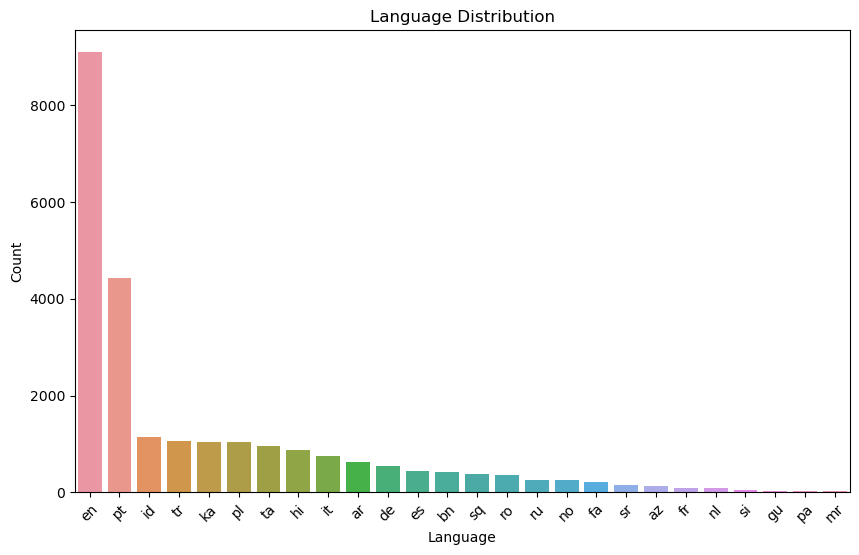

In [38]:
# Convert to DataFrame for Seaborn
language_distribution_df = language_distribution.reset_index()
language_distribution_df.columns = ['Language', 'Count']

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=language_distribution_df, x='Language', y='Count')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From the Bar plot, the most common language is English (en), with 9,101 occurences which is signifficantly higher than other languages while the least commong language is Marathi (mr) with just 24 occurences. The bar plot also indicates that the dataset has a diverse range of languages with a total of 26 different languages making the dataset good for multilingual fake news detection.


## **Site Analysis**

In [39]:
# Identify the most common sites and their respective contributions to the dataset.

site_distribution = combined_df['site'].value_counts()
display(site_distribution)

site
politifact.com                9101
piaui.folha.uol.com.br        2742
poligrafo.sapo.pt             1489
factcheck.ge                  1047
demagog.org.pl                1032
youturn.in                     962
cekfakta.com                   904
aajtak.in                      756
dogrulukpayi.com               710
pagellapolitica.it             641
misbar.com                     624
correctiv.org                  533
chequeado.com                  432
dailyo.in                      415
factual.ro                     355
teyit.org                      349
factcheck.kz                   249
faktisk.no                     243
cekfakta.tempo.co              234
kallxo.com                     221
factnameh.com                  207
aosfatos.org                   205
istinomer.rs                   159
faktoje.al                     158
faktyoxla.info                 137
hindi.newschecker.in           120
agi.it                         111
fr.africacheck.org              89
nieuwscheckers.

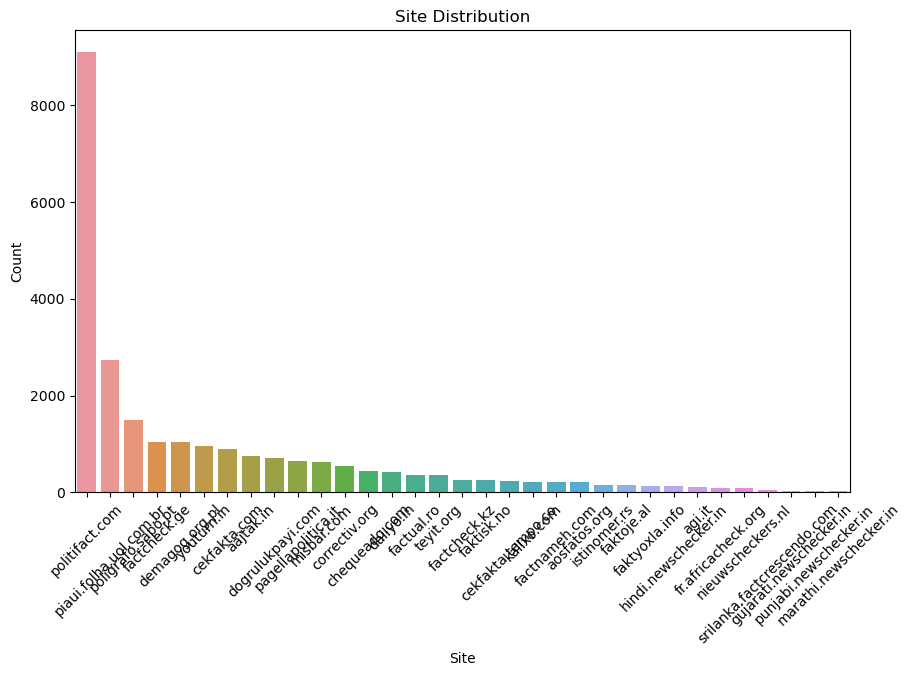

In [40]:
# Convert to DataFrame for Seaborn
site_distribution_df = site_distribution.reset_index()
site_distribution_df.columns = ['Site', 'Count']

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=site_distribution_df, x='Site', y='Count')
plt.title('Site Distribution')
plt.xlabel('Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Based on the bar plot most of the news and fact checks were gotten from ***politifact.com***, with 9,101 occurences. This is followed by ***piaui.folha.uol.com.br*** which is mostly used in Brazilian Portugese speaking regions with 2,742 occurrences, ***poligrafo.sapo.pt*** (1,489 occurrences), ***cekfakta.com*** (904 occurrences), and ***misbar.com*** (642 occurrences) are also significant contributors, reflecting the presence of fact-checking activities in Indonesia, Portugal, and the Middle East, respectively.

***marathi.newschecker.in*** is the least cited source, with only 24 occurrences, indicating that Marathi fact-checking content is relatively rare in the dataset which we noticed from the language analysis bar plot.

The dataset has a total of 33 different sources, which shows the broad representation of fact checking websites from around the world. This diversity helps to ensure that the dataset covers various languages and topics for comprehencive fake news detection.

## **Claim Verification Analysis**

In [41]:
# Analyze the labels assigned to claims to understand the distribution of verified vs. unverified claims.

claim_label_distribution = combined_df['label'].value_counts()
display(claim_label_distribution)

label
false    15107
true      9333
Name: count, dtype: int64

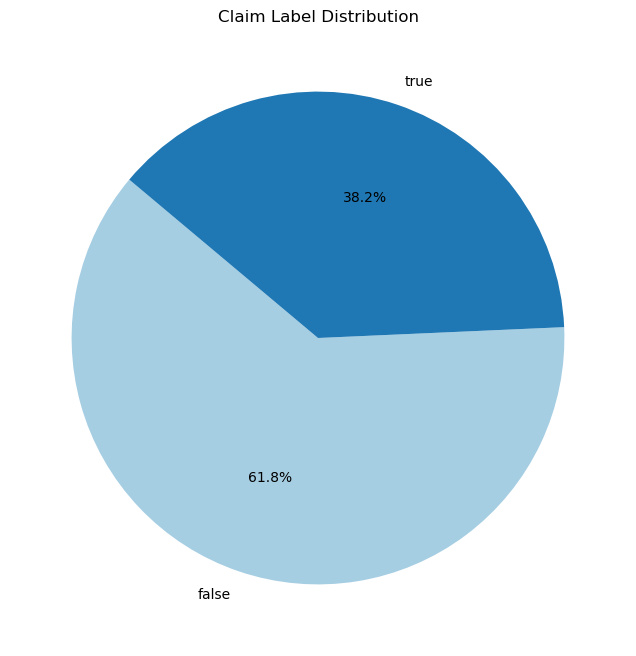

In [42]:
plt.figure(figsize=(8, 8))
claim_label_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Claim Label Distribution')
plt.ylabel('')
plt.show()

The most common label is the "false" label with 15,107 (61.8%) occurences, followed by the "true" label with 9,333 (38.2%) occurences. From the pie chart of the claim label distribution, there's a class imbalance in the dataset "False" is almost up to half of the "True" label.

### Balancing dataset

The train dataset will be balanced by removing some (30%) of the labels with 'false' rows from the dataset. The train dataset was the only one balanced to prevent overfitting in the dataset while since the test dataset should be a representative of a real world dataset it's not necessary to balance the test dataset.

In [43]:
# Remove half of the rows with 'false' labels from the dataset

if combined_df['label'].value_counts().false == 15107:
    # Select rows where label is false
    false_rows = train_preprocessed[train_preprocessed['label'] == 'false']

    # Randomly sample half of the rows where label is 'false'
    sampled_false_rows = false_rows.sample(frac=0.30, random_state=42)

    # Drop these sampled rows from the original DataFrame
    train_preprocessed = train_preprocessed.drop(sampled_false_rows.index)

    combined_df = pd.concat([ood_preprocessed, dev_preprocessed, train_preprocessed, test_preprocessed, zeroshot_preprocessed], ignore_index=True)

In [44]:
train_preprocessed['label'].value_counts()

label
false    7314
true     7218
Name: count, dtype: int64

### CLAIM ANALYSIS AFTER DATASET BALANCING

label
false    11973
true      9333
Name: count, dtype: int64

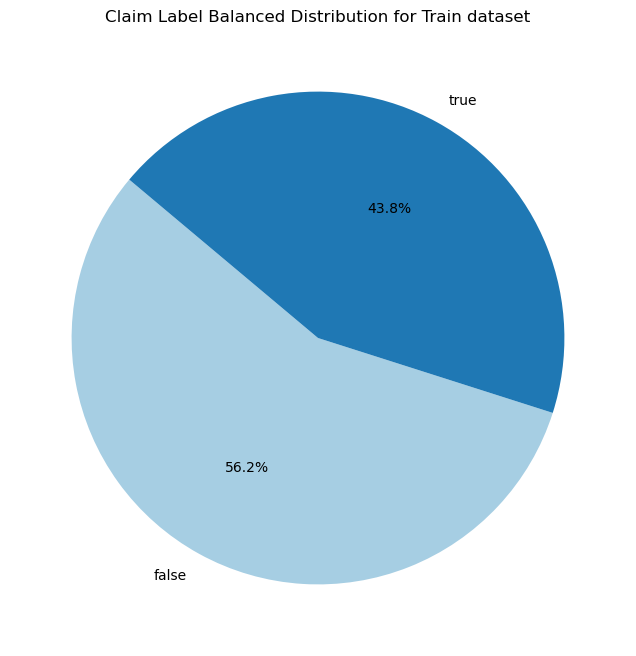

In [45]:
# Analyze the labels assigned to claims to understand the distribution of verified vs. unverified claims.

train_claim_label_distribution = combined_df['label'].value_counts()
display(train_claim_label_distribution)

plt.figure(figsize=(8, 8))
train_claim_label_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Claim Label Balanced Distribution for Train dataset')
plt.ylabel('')
plt.show()

From the balanced pie chart we notice a more balanced dataset with 11,973(56.2%) 'false' occurences and 9,333(43.8%) 'true' occurences.

## **Natural Language Inference (NLI) Analysis**

In [46]:
# Analyze the NLI labels and probabilities for the evidence provided.

nli_label_distribution_1 = combined_df['evidence_1_nli_label'].value_counts()
nli_label_distribution_2 = combined_df['evidence_2_nli_label'].value_counts()
avg_nli_prob_1 = combined_df['evidence_1_nli_probability'].mean()
avg_nli_prob_2 = combined_df['evidence_2_nli_probability'].mean()

display("Distribuition of nli labels for evidence 1")
display(nli_label_distribution_1)

print("\n")
display("Distribuition of nli labels for evidence 2")
display(nli_label_distribution_2)

print("\n")
display("Distribuition of nli probability for evidence 1")
display(avg_nli_prob_1)

print("\n")
display("Distribuition of nli probability for evidence 2")
display(avg_nli_prob_2)

'Distribuition of nli labels for evidence 1'

evidence_1_nli_label
entailment       12316
neutral           6066
contradiction     2924
Name: count, dtype: int64

'Distribuition of nli labels for evidence 2'

evidence_2_nli_label
entailment       11285
neutral           6888
contradiction     3133
Name: count, dtype: int64

'Distribuition of nli probability for evidence 1'

83.97613348352577

'Distribuition of nli probability for evidence 2'

82.41178541255985

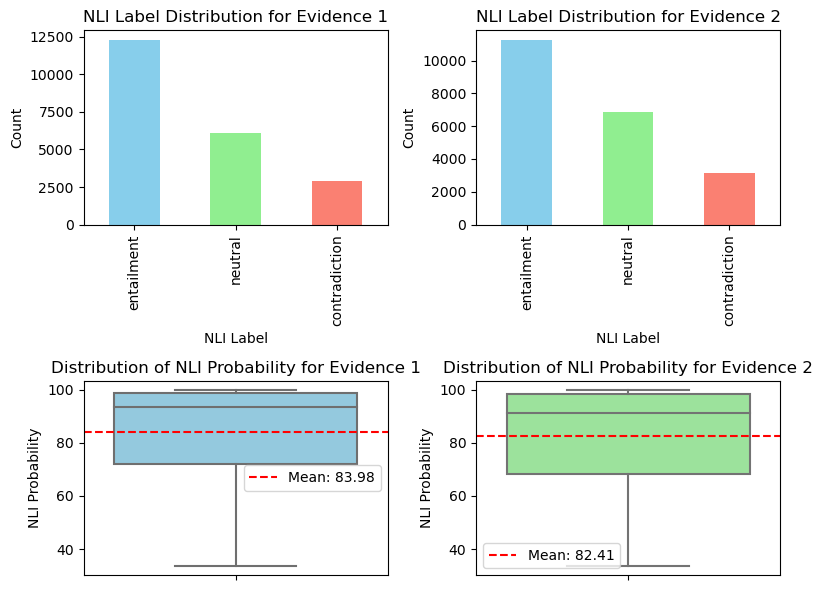

In [47]:
# Visualize NLI Label Distribution for Evidence 1
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
nli_label_distribution_1.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('NLI Label Distribution for Evidence 1')
plt.xlabel('NLI Label')
plt.ylabel('Count')

# Visualize NLI Label Distribution for Evidence 2
plt.subplot(2, 2, 2)
nli_label_distribution_2.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('NLI Label Distribution for Evidence 2')
plt.xlabel('NLI Label')
plt.ylabel('Count')

# Box plot for distribution of evidence 1 and 2 probability
evidence_1_probabilities = combined_df['evidence_1_nli_probability']
evidence_2_probabilities = combined_df['evidence_2_nli_probability']


# Box plot for Evidence 1
plt.subplot(2, 2, 3)
sns.boxplot(y=evidence_1_probabilities, color='skyblue')
plt.title('Distribution of NLI Probability for Evidence 1')
plt.ylabel('NLI Probability')
plt.axhline(avg_nli_prob_1, color='red', linestyle='--', label='Mean: {:.2f}'.format(avg_nli_prob_1))
plt.legend()

# Box plot for Evidence 2
plt.subplot(2, 2, 4)
sns.boxplot(y=evidence_2_probabilities, color='lightgreen')
plt.title('Distribution of NLI Probability for Evidence 2')
plt.ylabel('NLI Probability')
plt.axhline(avg_nli_prob_2, color='red', linestyle='--', label='Mean: {:.2f}'.format(avg_nli_prob_2))
plt.legend()

plt.tight_layout()
plt.show()

The bar plot above shows that for evidence 1, ententailment is the most common label, followed by neutral and contradiction. For Evidence 2, entailment is also the most common, but the counts for neutral and contradiction are slightly different compared to Evidence 1.

The  average probabilities provide insight into the confidence levels of the NLI model for the labels assigned to the evidence. The average NLI probability for Evidence 1 is 83.97, indicating high confidence in the label assignments. The average NLI probability for Evidence 2 is 82.41, which is slightly lower but still indicates relatively high confidence.


## **WORD CLOUD FOR NEWS WITH LABEL 'FALSE' AND 'TRUE'**

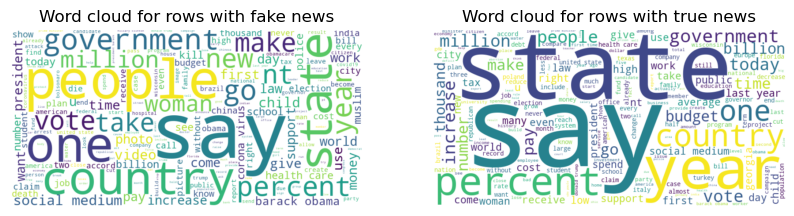

In [48]:


# Select rows where label is false
false_rows = combined_df[combined_df['label'] == 'false']
true_rows = combined_df[combined_df['label'] == 'true']

# Combine text from columns into a single string
false_text = ' '.join(false_rows['claim_translated'].dropna())
true_text = ' '.join(true_rows['claim_translated'].dropna())

# Create a word cloud object
false_news_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(false_text)
true_news_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_text)

# Display 2 word clouds side by side
plt.figure(figsize=(10, 12))
plt.subplot(1, 2, 1)
plt.imshow(false_news_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for rows with fake news')

plt.subplot(1, 2, 2)
plt.imshow(true_news_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for rows with true news')
plt.show()

From the word cloud above which shows the most occuring words for claims categorized and real and fake, both word clouds have common words like people, sy, state and government.

But most news classified as fake have words like government, state and country occuring more than they are occuring in the word cloud for real news.

# MODEL DEVELOPMENT

## Feature Extraction using TF-IDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack, csr_matrix

categorical_columns = ['language', 'site', 'evidence_1_nli_label', 'evidence_2_nli_label', 'evidence_3_nli_label', 
        'evidence_4_nli_label','evidence_5_nli_label']


# Function that vectorizes text data, converts categorical columns to numeric values
def extract_features_tfidf(X_train, X_test, y_train, y_test):
    
    # Vectorize text data using Tf-Idf
    vectorizer = TfidfVectorizer()
    
    # fit TF-IDF vectorizer on train data
    vectorizer.fit(X_train['claim_translated'])
    
    # Apply transform on train and test data
    tfidf_matrix_train = vectorizer.transform(X_train['claim_translated'])
    tfidf_matrix_test = vectorizer.transform(X_test['claim_translated'])
  
    # Convert columns to 'category' dtype
    X_train[categorical_columns] = X_train[categorical_columns].astype('category')
    X_test[categorical_columns] = X_test[categorical_columns].astype('category')

    # Convert categorical columns to numerical codes
    for col in categorical_columns:
        X_train[col] = X_train[col].cat.codes
        X_test[col] = X_test[col].cat.codes
    
    # Convert numerical category codes to sparse matrices
    category_codes_train = X_train[categorical_columns].values
    category_codes_test = X_test[categorical_columns].values

    # Combine TF-IDF features with category codes
    combined_matrix_train = hstack([tfidf_matrix_train, category_codes_train])
    combined_matrix_test = hstack([tfidf_matrix_test, category_codes_test])

    return combined_matrix_train, y_train, combined_matrix_test, y_test;

In [50]:
# Extract X features for train, test and dev features

X_train = train_preprocessed[['language', 'site', 'claim_translated',
                              'evidence_1_nli_label','evidence_2_nli_label', 'evidence_3_nli_label',
                              'evidence_4_nli_label', 'evidence_5_nli_label']]
X_dev = dev_preprocessed[['language', 'site', 'claim_translated',
                              'evidence_1_nli_label','evidence_2_nli_label', 'evidence_3_nli_label',
                              'evidence_4_nli_label', 'evidence_5_nli_label'
                             ]]


X_test = test_preprocessed[['language', 'site', 'claim_translated',
                              'evidence_1_nli_label','evidence_2_nli_label', 'evidence_3_nli_label',
                              'evidence_4_nli_label', 'evidence_5_nli_label']]

# Extract y features for train, test and dev features
y_train = train_preprocessed['label']
y_test = test_preprocessed['label']
y_dev = dev_preprocessed['label']

# X = pd.concat([X_train, X_dev, X_test])
# y = pd.concat([y_train, y_test, y_dev])


# Extract features from dataset
X_train, y_train, X_test, y_test = extract_features_tfidf(X_train, X_test, y_train, y_test)

display(f'X Train Shape: {X_train.shape}')
display(f'X Test Shape: {X_test.shape}')

/var/folders/vh/v_phs5nx2v5d44930q604pjw0000gn/T/ipykernel_1242/601830424.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[categorical_columns] = X_train[categorical_columns].astype('category')
/var/folders/vh/v_phs5nx2v5d44930q604pjw0000gn/T/ipykernel_1242/601830424.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[categorical_columns] = X_test[categorical_columns].astype('category')
/var/folders/vh/v_phs5nx2v5d44930q604pjw0000gn/T/ipykernel_1242/601830424.py:31: SettingWithCopyWarnin

'X Train Shape: (14532, 16410)'

'X Test Shape: (2372, 16410)'

## Train Dataset using Random Forest

In [51]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)

In [52]:
# Random classifier model evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       false       0.76      0.68      0.72      1423
        true       0.59      0.68      0.63       949

    accuracy                           0.68      2372
   macro avg       0.67      0.68      0.67      2372
weighted avg       0.69      0.68      0.68      2372



## Training Dataset using XGB classifier

In [53]:
pip install xgboost

DEPRECATION: Loading egg at /Users/philipajao/anaconda3/lib/python3.11/site-packages/tf_keras_contrib-2.0.8-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [54]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Convert y train and y test to categorical values

# Initialize LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)


xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train_encoded)

# Predicting the Test set results
y_pred = xgb_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test_encoded, y_pred)

In [55]:
# XGBoost model classification
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      1423
           1       0.57      0.68      0.62       949

    accuracy                           0.66      2372
   macro avg       0.66      0.67      0.66      2372
weighted avg       0.68      0.66      0.67      2372



# Bi-Directional LSTM

## FEATURE EXTRACTION WITH TENSOR FLOW KERAS TOKENIZER

**DEFINE COLUMNS FROM TRAIN AND TEST DATASET**

In [56]:
lstm_train = train_preprocessed[['language', 'site', 'claim_translated',
                              'evidence_1_nli_label','evidence_2_nli_label', 'evidence_3_nli_label',
                              'evidence_4_nli_label', 'evidence_5_nli_label', 'label']]

lstm_dev = dev_preprocessed[['language', 'site', 'claim_translated',
                              'evidence_1_nli_label','evidence_2_nli_label', 'evidence_3_nli_label',
                              'evidence_4_nli_label', 'evidence_5_nli_label', 'label']]

lstm_test = test_preprocessed[['language', 'site', 'claim_translated',
                              'evidence_1_nli_label','evidence_2_nli_label', 'evidence_3_nli_label',
                              'evidence_4_nli_label', 'evidence_5_nli_label', 'label']]

display(lstm_train.shape)
display(lstm_test.shape)

(14532, 9)

(2372, 9)

In [57]:
# Get the maximum length of claim_translated sentence in our dataset\

max_len = 0

lstm_train['sentence_length'] = lstm_train['claim_translated'].apply(len)

# Check the maximum sentence length
max_len = lstm_train['sentence_length'].max()
print('Max sentence length: ', max_len)

display(lstm_train['sentence_length'])

Max sentence length:  2591


/var/folders/vh/v_phs5nx2v5d44930q604pjw0000gn/T/ipykernel_1242/2923312247.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstm_train['sentence_length'] = lstm_train['claim_translated'].apply(len)


2        41
3        44
4        35
5        46
8        53
         ..
23440    57
23442    66
23443    57
23445    27
23446    49
Name: sentence_length, Length: 14532, dtype: int64

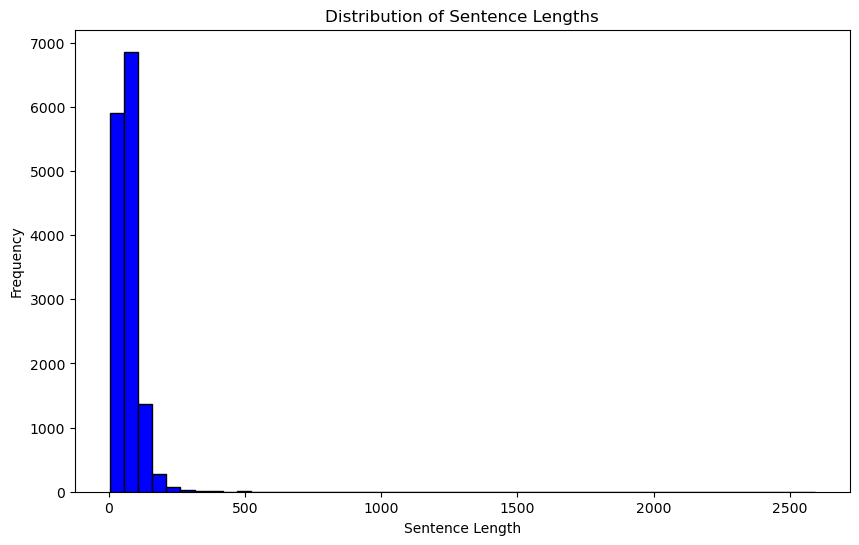

In [58]:
import matplotlib.pyplot as plt

# Plot the distribution of sentence lengths
plt.figure(figsize=(10, 6))
plt.hist(lstm_train['sentence_length'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()


most of our sentence length is between 0-500, that'll be set as the max_len for training the bi_lstm model

**FUNCTION TO EXTRACT TEXT FEATURES**

In [59]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


# Parameters
vocab_size = 10000
max_len = 500
trunc_type = 'post'
oov_tok = '<OOV>'

# Define function to extract text features
def extract_text_features(lstm_train, lstm_test, lstm_dev):
    sentences_train = []
    sentences_test = []
    sentences_dev = []
    
    # Iterate over train dataset to extract 'claim_translated' and 'label' columns
    for i in lstm_train.index:
        sentences_train.append(lstm_train['claim_translated'][i])

    # Iterate over test dataset to extract 'claim_translated' and 'label' columns
    for i in lstm_test.index:
        sentences_test.append(lstm_test['claim_translated'][i])
        
    # Iterate over dev dataset to extract 'claim_translated' and 'label' columns
    for i in lstm_dev.index:
        sentences_dev.append(lstm_dev['claim_translated'][i])
    
     # Initialize the Tokenizer with specified vocabulary size and out-of-vocabulary token
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    
    # Fit the tokenizer on the training sentences to build the word index
    tokenizer.fit_on_texts(sentences_train)
    word_index = tokenizer.word_index

    # Convert train sentences to sequences of integers
    train_word_sequence = tokenizer.texts_to_sequences(sentences_train)
    train_padd_sequence = pad_sequences(train_word_sequence, maxlen=max_len, truncating=trunc_type)

    # Convert test sentences to sequences of integers
    test_word_sequence = tokenizer.texts_to_sequences(sentences_test)
    test_padd_sequence = pad_sequences(test_word_sequence, maxlen=max_len, truncating=trunc_type)
    
    # Convert dev sentences to sequences of integers
    dev_word_sequence = tokenizer.texts_to_sequences(sentences_dev)
    dev_padd_sequence = pad_sequences(dev_word_sequence, maxlen=max_len, truncating=trunc_type)
    
    return train_padd_sequence, test_padd_sequence, dev_padd_sequence


**FUNCTION TO EXTRACT CATEGORICAL, LABEL AND (TEXT FEATURES USING EARLIER DEFINED FUNCTION)**

In [60]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['language', 'site', 'evidence_1_nli_label', 'evidence_2_nli_label', 'evidence_3_nli_label', 
        'evidence_4_nli_label','evidence_5_nli_label']

# Define function to extract LSTM features
def extract_lstm_features(lstm_train, lstm_test, lstm_dev):

    label_train = []
    label_test = []
    label_dev = []

    # One-hot encode categorical columns
    encoder = OneHotEncoder(categories = "auto")
    cat_train = encoder.fit_transform(lstm_train[categorical_columns])
    cat_test = encoder.transform(lstm_test[categorical_columns])
    cat_dev = encoder.transform(lstm_dev[categorical_columns])

    # Extract text features using the function 'extract_text_features'
    train_padd_sequence, test_padd_sequence, dev_padd_sequence = extract_text_features(lstm_train, lstm_test, lstm_dev)
    
    # Extract labels for training and testing data
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    label_train = label_encoder.fit_transform(lstm_train['label'])
    label_test = label_encoder.fit_transform(lstm_test['label'])
    label_dev = label_encoder.fit_transform(lstm_dev['label'])
    

    # Return the concatenated categorical data, padded text sequences, and labels
    return cat_train, cat_test, cat_dev, train_padd_sequence, test_padd_sequence, dev_padd_sequence, label_train, label_test, label_dev;


In [61]:
train_cat, test_cat, dev_cat, train_padd_sequence, test_padd_sequence, dev_padd_sequence, label_train, label_test, label_dev = extract_lstm_features(lstm_train, lstm_test, lstm_dev)


display(train_cat.shape)
display(test_cat.shape)
display(dev_cat.shape)

(14532, 44)

(2372, 44)

(1449, 44)

In [62]:

train_cat.shape
dev_cat.shape

(1449, 44)

## BUILD, TRAIN AND TEST BI-DIRECTIONAL LSTM MODEL

**BUILD BI-DIRECTIONAL LSTM MODEL**

In [63]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, MaxPooling1D, Dense, concatenate, Dropout, Bidirectional
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.regularizers import l2

# Define input layers
claim_input = Input(shape=(max_len,), name='claim_input')
cat_input = Input(shape=(train_cat.shape[1],), name='cat_input')

#Embedding layer for the claim input
embedding_dim = 16
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)(claim_input)

# Bidirectional LSTM layer
bi_lstm1 = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))(embedding_layer)

# Bidirectional LSTM layer
bi_lstm2 = Bidirectional(LSTM(32, kernel_regularizer=l2(0.01)))(bi_lstm1)

# Concatenate BI-LSTM output with categorical inputs
X = concatenate([bi_lstm2, cat_input])

# Add a dense layer
X = Dense(64, activation='relu')(X)
X = Dropout(0.5)(X)
output = Dense(1, activation='sigmoid')(X)

# Define the model
bi_lstm_model = Model(inputs=[claim_input, cat_input], outputs=output)

# Compile the model
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

bi_lstm_model.summary()


/Users/philipajao/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ claim_input         │ (None, 500)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 500, 16)   │    160,000 │ claim_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 500, 128)  │     41,472 │ embedding[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 64)        │     41,216 │ bidirectional[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cat_input           │ (None, 44)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 108)       │          0 │ bidirectional_1[… │
│ (Concatenate)       │                   │            │ cat_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      6,976 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         65 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 249,729 (975.50 KB)

 Trainable params: 249,729 (975.50 KB)

 Non-trainable params: 0 (0.00 B)

**TRAIN BI-DIRECTIONAL LSTM MODEL**

Use early stopping to reduce overfitting

In [64]:
import tensorflow as tf

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
history = bi_lstm_model.fit(
    [train_padd_sequence, train_cat],
    label_train,
    epochs=10,
    batch_size=30,
    validation_data=([dev_padd_sequence, dev_cat], label_dev),
    shuffle=True,
    callbacks=[early_stop]
)

Epoch 1/10
429/485 ━━━━━━━━━━━━━━━━━━━━ 15s 281ms/step - accuracy: 0.5533 - loss: 1.6296 - precision: 0.5510 - recall: 0.5687

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Evaluate the model
results = bi_lstm_model.evaluate([test_padd_sequence, test_cat], label_test)
print(f"Loss: {results[0]}")
print(f"Accuracy: {results[1]}")
print(f"Precision: {results[2]}")
print(f"Recall: {results[3]}")

# Plot training & validation loss and accuracy
def plot_history(history):
    plt.figure(figsize=(12, 5))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

plot_history(history)

# Confusion Matrix
y_pred_probs = bi_lstm_model.predict([test_padd_sequence, test_cat])
y_pred = (y_pred_probs > 0.5).astype(int)
conf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(label_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(label_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# RNN(BIDIRECTIONAL LSTM) + CNN 

In [82]:
from tensorflow.keras import regularizers

train_cat, test_cat, dev_cat, train_padd_sequence, test_padd_sequence, dev_padd_sequence, label_train, label_test, label_dev = extract_lstm_features(lstm_train, lstm_test, lstm_dev)


num_filters = 128  # Number of filters for Conv1D
kernel_size = 5  # Kernel size for Conv1D
pool_size = 4  # Pool size for MaxPooling1D
lstm_units = 64 
dropout_rate = 0.5

# Claim input pipeline
claim_input = Input(shape=(max_len,), name='claim_input')

#Embedding layer for the claim input
embedding_dim = 16
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)(claim_input)

claim_conv = Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu')(embedding_layer)
claim_pool = MaxPooling1D(pool_size=pool_size)(claim_conv)

# Bidirectional LSTM layer
bi_lstm1 = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))(claim_pool)

# Bidirectional LSTM layer
bi_lstm2 = Bidirectional(LSTM(32, kernel_regularizer=l2(0.01)))(bi_lstm1)

claim_dropout = Dropout(rate=dropout_rate)(bi_lstm2)

# Category input pipeline
category_input = Input(shape=(train_cat.shape[1],), name='category_input')

# Concatenate the outputs of both pipelines
concatenated = concatenate([claim_dropout, category_input])

# Fully connected layer
dense = Dense(units=64, activation='relu')(concatenated)
output = Dense(units=1, activation='sigmoid')(dense)

# Model
cnn_bilstm_model = Model(inputs=[claim_input, category_input], outputs=output)

# Compile the model
cnn_bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Model summary
cnn_bilstm_model.summary()

/Users/philipajao/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ claim_input         │ (None, 500)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 500, 16)   │    160,000 │ claim_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 496, 128)  │     10,368 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 124, 128)  │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 124, 128)  │     98,816 │ max_pooling1d[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 64)        │     41,216 │ bidirectional_2[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ bidirectional_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category_input      │ (None, 44)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 108)       │          0 │ dropout_1[0][0],  │
│ (Concatenate)       │                   │            │ category_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      6,976 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 317,441 (1.21 MB)

 Trainable params: 317,441 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
print(type(train_padd_sequence))
# Train the model
history = cnn_bilstm_model.fit(
    {'claim_input': train_padd_sequence, 'category_input': train_cat},
    label_train,
    epochs=10,
    batch_size=30,
    validation_data=([dev_padd_sequence, dev_cat], label_dev),
    callbacks=[early_stop]
)

<class 'numpy.ndarray'>
Epoch 1/10


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 108, but received input with shape (None, 564)[0m

Arguments received by Functional.call():
  • inputs={'claim_input': 'tf.Tensor(shape=(None, 500), dtype=int32)', 'category_input': 'tf.Tensor(shape=(None, 44), dtype=float32)'}
  • training=True
  • mask={'claim_input': 'None', 'category_input': 'None'}

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Evaluate the model
results = cnn_bilstm_model.evaluate([test_padd_sequence, test_cat], label_test)
print(f"Loss: {results[0]}")
print(f"Accuracy: {results[1]}")
print(f"Precision: {results[2]}")
print(f"Recall: {results[3]}")

# Plot training & validation loss and accuracy
def plot_history(history):
    plt.figure(figsize=(12, 5))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

plot_history(history)

# Confusion Matrix
y_pred_probs = cnn_bilstm_model.predict([test_padd_sequence, test_cat])
y_pred = (y_pred_probs > 0.5).astype(int)
conf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(label_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(label_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# TRANSFORMER BASED MODELS BERT/GPT

## BERT MODEL

**DEFINCE COLUMNS**

In [ ]:
# bert_train = train_preprocessed[['language', 'site', 'claim_translated',
#                               'evidence_1_nli_label','evidence_2_nli_label', 'evidence_3_nli_label',
#                               'evidence_4_nli_label', 'evidence_5_nli_label', 'label']]

# # combined_df = pd.concat([ood_preprocessed, dev_preprocessed, train_preprocessed, test_preprocessed, zeroshot_preprocessed], ignore_index=True)

# bert_test = test_preprocessed[['language', 'site', 'claim_translated',
#                               'evidence_1_nli_label','evidence_2_nli_label', 'evidence_3_nli_label',
#                               'evidence_4_nli_label', 'evidence_5_nli_label', 'label']]

# bert_dev = dev_preprocessed[['language', 'site', 'claim_translated',
#                               'evidence_1_nli_label','evidence_2_nli_label', 'evidence_3_nli_label',
#                               'evidence_4_nli_label', 'evidence_5_nli_label', 'label']]

# display(bert_train.shape)
# display(bert_test.shape)
# display(bert_dev.shape)

In [65]:
gpt_train = train_preprocessed[['language', 'site', 'claim_translated',
                              'evidence_1_nli_label','evidence_2_nli_label', 'evidence_3_nli_label',
                              'evidence_4_nli_label', 'evidence_5_nli_label', 'label']]

# combined_df = pd.concat([ood_preprocessed, dev_preprocessed, train_preprocessed, test_preprocessed, zeroshot_preprocessed], ignore_index=True)

gpt_test = test_preprocessed[['language', 'site', 'claim_translated',
                              'evidence_1_nli_label','evidence_2_nli_label', 'evidence_3_nli_label',
                              'evidence_4_nli_label', 'evidence_5_nli_label', 'label']]

gpt_dev = dev_preprocessed[['language', 'site', 'claim_translated',
                              'evidence_1_nli_label','evidence_2_nli_label', 'evidence_3_nli_label',
                              'evidence_4_nli_label', 'evidence_5_nli_label', 'label']]

display(gpt_train.shape)
display(gpt_test.shape)
display(gpt_dev.shape)

(14532, 9)

(2372, 9)

(1449, 9)

**EXTRACT FEATURES**

In [ ]:
# from transformers import BertTokenizer, TFBertForSequenceClassification
# import tensorflow as tf

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [81]:
import torch
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, Trainer, TrainingArguments

RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
cannot import name 'DEFAULT_CIPHERS' from 'urllib3.util.ssl_' (/Users/philipajao/anaconda3/lib/python3.11/site-packages/urllib3/util/ssl_.py)

**COMBINE THE CATEGORICAL FEATURES TO TEXT FEATURES, SEPERATED WITH [SEP]**

Idea from here https://mccormickml.com/2021/06/29/combining-categorical-numerical-features-with-bert/#31-all-features-to-text

In [ ]:
# # Combine categorical features into a single string
# categorical_features = ['language', 'site', 'evidence_1_nli_label', 'evidence_2_nli_label', 'evidence_3_nli_label', 'evidence_4_nli_label', 'evidence_5_nli_label']
# bert_train['combined'] = bert_train[categorical_features].astype(str).apply(lambda x: ' [SEP] '.join(x), axis=1)
# bert_test['combined'] = bert_test[categorical_features].astype(str).apply(lambda x: ' [SEP] '.join(x), axis=1)
# bert_dev['combined'] = bert_dev[categorical_features].astype(str).apply(lambda x: ' [SEP] '.join(x), axis=1)

# # Append the combined categorical string to the text
# bert_train['input_text'] = bert_train['claim_translated'] + ' [SEP] ' + bert_train['combined']
# bert_test['input_text'] = bert_test['claim_translated'] + ' [SEP] ' + bert_test['combined']
# bert_dev['input_text'] = bert_dev['claim_translated'] + ' [SEP] ' + bert_dev['combined']

In [ ]:
# display(bert_train.head())

In [ ]:
# #display(bert_train['claim_translated'].head())
# display(bert_train['input_text'].iloc[1])
# display(tokenizer.encode(bert_train['input_text'].iloc[1]))
# tokenizer.convert_ids_to_tokens(tokenizer.encode(bert_train['input_text'].iloc[1]))

In [ ]:
# max_len = 512
# def extract_bert_features(df, max_len):
#     # Tokenize sentences and map tokens to word IDs
#     input_ids = []
#     attention_masks = []
#     i = 0
    
#     for claim in df['input_text']:
        
#         if i < 2:
#             print(claim)
            
#         encoded_dict = tokenizer.encode_plus(
#             claim,
#             add_special_tokens = True, # Add '[CLS]' and '[SEP]'
#             max_length = max_len, # Pad & truncate all sentences
#             pad_to_max_length = True,
#             return_attention_mask = True,
#             truncation = True
#         )
        
#         if i < 2:
#             print("dict", encoded_dict['input_ids'])

#         # Add the encoded sentences to list
#         input_ids.append(encoded_dict['input_ids'])

#         # Add the encoded sentences to list
#         attention_masks.append(encoded_dict['attention_mask'])
        
#         i += 1
        
#     #Convert to tensors and return
#     input_ids = tf.convert_to_tensor(input_ids)
#     attention_masks = tf.convert_to_tensor(attention_masks)
    
    
#     return input_ids, attention_masks;

In [ ]:
# train_inp, train_mask =  extract_bert_features(bert_train, max_len)
# test_inp, test_mask =  extract_bert_features(bert_test, max_len)
# dev_inp, dev_mask =  extract_bert_features(bert_dev, max_len)

# # Extract labels for training and testing data
# label_encoder = LabelEncoder()
# label_train = label_encoder.fit_transform(bert_train['label'])
# label_test = label_encoder.fit_transform(bert_test['label'])
# label_dev = label_encoder.fit_transform(bert_dev['label'])

# # Convert encoded labels to tensors
# train_label = tf.convert_to_tensor(label_train)
# test_label = tf.convert_to_tensor(label_test)
# dev_label = tf.convert_to_tensor(label_dev)


# print("Train input shape ", train_inp.shape)
# print("Train mask shape ", train_mask.shape)
# print("Test input shape ", test_inp.shape)
# print("Test mask shape ", test_mask.shape)
# print("Train Label shape ", train_label.shape)
# print("Test Label shape ", test_label.shape)

**MODEL DEVELOPMENT**

followed steps from https://medium.com/@yashvardhanvs/classification-using-pre-trained-bert-model-transfer-learning-2d50f404ed4c

In [ ]:

# from transformers import TFBertForSequenceClassification


# bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# model_save_path = '/Users/philipajao/Downloads/thesis/models/bert_model.h5'

# callbacks = tf.keras.callbacks.ModelCheckpoint(
#     filepath=model_save_path,
#     save_weights_only=True,
#     monitor='val_loss',
#     mode='min',
#     save_best_only=True
# )


# bert_model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=['accuracy']
# )

In [ ]:
# train_inputs = {
#     'input_ids': train_inp,
#     'attention_mask': train_mask
# }

# test_inputs = {
#     'input_ids': test_inp,
#     'attention_mask': test_mask
# }

# dev_inputs = {
#     'input_ids': dev_inp,
#     'attention_mask': dev_mask
# }


# # Fit the model
# history = bert_model.fit(train_inputs, train_label, epochs=3, batch_size=5, validation_data=(dev_inputs, dev_label), callbacks=callbacks)

